## COMP5721M: Programming for Data Science 

## Coursework 3: Data Analysis Project

Last modified: 3 December 2023

# MET Office Data Analysis: Is There Evidence for Global Warming in the UK?

* Omar Choudhry, sc20osc@leeds.ac.uk / scsoc@leeds.ac.uk
* David Marples, edu9d2m@leeds.ac.uk
* Riham Hlis, scrhl@leeds.ac.uk
* Patryk Wasniewski, bs19pw@leeds.ac.uk

**Note:** We have tested this notebook on `Python 3.9.5` and `3.12.0`. The notebook may take some time to run at first if there are missing packages, however the overall notebook runs fairly quickly.

# Project Plan

## The Data (10 marks)

We plan to use the following datasets:

- **Met Office Public Monthly Climate Data**:
  - There are freely available datasets (as text files) from the met office at the level of the whole UK, monthly. 
  - These cover mean temperature, rainfall, number of rainfall days, and number of sunshine days.
  - Each data set contains measurements for each month, season and an annual average, with the annual average alone being used for all of the data sets. 
  - All the data sets used come from the Met Office, which is a national meteorological service, an official government agency, suggesting a high degree of accuracy. 
  - This data is complete (with literally a handful of missing values), for the years available.
  - Although the data is fairly noisy, this is most likely a reflection of the natural fluctuations in weather and most probably a feature of UK weather, rather than very inaccurate measurements.
  - The data is initially in text format and converted into DataFrames for analysis, i.e. raw data processing.
  - https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmean/date/UK.txt
  - https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmin/date/UK.txt
  - https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmax/date/UK.txt
  - https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Sunshine/date/UK.txt
  - https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Rainfall/date/UK.txt
  - https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Raindays/date/UK.txt
  - https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/AirFrost/date/UK.txt
- **Met Office UK Climate Data (1853 - 2020):**
  - Additional data is available with daily resolution, on a grid over the UK that would allow finer resolution (for example, “Yorkshire rainfall over a rolling week”), but (a) you need to be registered (which one of the group members (David) is), (b) this data is in .nc format, (c) there are separate files for each year, and (d) it potentially is a HUGE dataset.
  - https://www.metoffice.gov.uk/research/climate/maps-and-data/uk-and-regional-series
- **Ice core CO<sub>2</sub> data:**
  - This data is from the NOAA Global Monitoring Laboratory (US government agency), and may be considered accurate, though it is only available at the annual level. 
  - Data was cropped down manually to include only the  CO2 levels, in parts per million.
  - https://www.ncei.noaa.gov/pub/data/paleo/contributions_by_author/frank2010/smoothedco2.txt
- **Mauna Loa (direct monthly CO<sub>2</sub> measurements):**
  - This data is widely used as the definitive best data for atmospheric CO2, in parts per million. It is complete, and can be considered accurate.
  - https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt 
- **Yorkshire and Humber Temperature Data:**
  - Yorkshire and Humber daily maximum temperature and daily rainfall data come from the CEDA archive of the Met Office data. 
  - This data is complete, for the years available, and can be considered accurate. 
  - https://dap.ceda.ac.uk/badc/ukmo-hadobs/data/insitu/MOHC/HadOBS/HadUK-Grid/v1.2.0.ceda/region/

## Project Aim and Objectives (5 marks)

__Overall Objective__: To use data from a variety of sources to investigate whether there is evidence for changes in the UK climate. We will consider whether these are associated with changes in the volume of CO<sub>2</sub>, O<sub>3</sub> and frequency of extreme weather events.

__Aim__: In this project we will use a range of data sources to investigate whether there is evidence that these changes are happening in the UK, and in Yorkshire specifically.

__Hypotheses__: 

1. UK temperatures have been rising on average. 
2. Since this implies higher energy in the atmosphere, this is associated with more extreme weather events: 
  <tab><ol type="a">
    <li>more CO<sub>2</sub>,</li>
    <li>less O<sub>3</sub>,</li>
    <li>more heatwaves,</li>
    <li>intense periods of rainfall,</li>
    <li>and possibly more rainfall overall. </li>
  </ol></tab>

Based on the scientific understanding of global warming, it is theorized that temperatures in the UK have been increasing over recent decades. Additionally, it is proposed that factors such as sunshine, rainfall, and air frost influence temperatures and may be correlated with these temperature fluctuations. Consequently, changes in these environmental elements might contribute to temperature variations in the UK. Furthermore, since CO<sub>2</sub> is a known greenhouse gas, it is anticipated that escalating atmospheric CO<sub>2</sub> levels will generally correspond with rising temperatures. However, it is acknowledged that numerous factors impact global temperature, hence this correlation might only be apparent over the long term and following the smoothing of short-term temperature volatilities. It is also hypothesized that higher temperatures, indicative of increased atmospheric energy, could lead to more intense or frequent weather events, such as rainstorms. Given that heatwaves or periods of hot weather are defined relative to a constant threshold in this analysis, an increase in their frequency (and duration) is expected as part of the overall rise in temperatures. This increase might also be linked to heightened intensity in phenomena like high-pressure areas, commonly associated with periods of hot, sunny weather.

### Background

It is widely suggested that global atmospheric CO<sub>2</sub> levels have been escalating due to human activities, particularly the burning of fossil fuels, and this is contributing to climate change through the "greenhouse" effect of CO<sub>2</sub>. More specifically, this process is expected to cause a worldwide increase in average temperatures by trapping solar radiation (insolation). There is a prevalent argument that this rise in temperature will coincide with an upsurge in extreme weather phenomena, including storms and heatwaves. A logical consequence of more frequent heatwaves might be an increase in heat-related fatalities, particularly among patients with cardiovascular and respiratory conditions, who are more vulnerable to such impacts.

Climate change, a phenomenon linked to altering global temperatures and weather patterns, results from human-induced alterations in the atmosphere, primarily through fossil fuel consumption. This change is manifesting in varied ways across different regions, with some experiencing rising average temperatures while others may see a decline. In line with trends observed in the rest of Europe, the UK is likely experiencing a pattern of increasing temperatures since the onset of the industrial era. Furthermore, climate change, defined as the shift in climate due to anthropogenic fossil fuel usage, is also associated with alterations in weather patterns. Consequently, it is plausible that general weather patterns in the UK are undergoing transformations, which might be contributing to the observed changes in the nation's temperatures.

### Specific Objective(s)

##### __Objective 1:__ <u>Basic characterisation and investigation of correlations of temperature data in the UK</u> (including temperature, sunshine, airfrost, rainfall, etc). 

The task involves analyzing whether annually averaged temperatures across the UK have escalated in recent decades and whether these changes correlate with variations in sunshine, rainfall, and air frost. Temperature datasets will be procured and transformed into `Pandas DataFrame`s, followed by rigorous data cleansing. Subsequent analysis will entail graphical representation across different temporal segments, including months, seasons, and the entire year. The investigation will extend to computing mean temperatures and standard deviations across varying periods, utilizing statistical tests such as t-tests to ascertain if there has been a significant rise in mean temperature over approximately the last century. The analysis aims to discern linear correlations between temperature and other meteorological factors, with findings presented through summary statistics and graphical depictions, possibly utilizing rolling averages to smoothen acute annual fluctuations.

##### __Objective 2:__ <u>Compare atmospheric CO<sub>2</sub> levels with temperature and if temperature in the UK has been higher in the last three decades than in the late years of the 19th century.</u> 

CO<sub>2</sub> data, directly available and available monthly since 1960 and annually over several millennia from ice core records. The aim is to correlate this with UK temperature data, aligning it to ascertain the extent of correspondence between the increase in CO<sub>2</sub> over the past century and the expected rise in temperature.

#### __Objective 3:__ <u>Test whether ozone levels have changed over recent years, and whether this could be correlated with global warming effects</u>. 

This analysis might require data with a granularity finer than the basic monthly sets. It involves employing correlation techniques across different datasets to explore consistent relationships and ascertain if and how the equilibrium of these relationships is shifting over time.

##### __Objective 4:__ <u>Test whether Yorkshire temperature and rainfall patterns have changed</u> over the last ~60 years. 

Using a dataset covering daily maximum temperatures, heatwave duration and intensity will be investigated. Similarly, using a dataset over the last ~100 years, evidence for whether rainfall patterns have changed: are there more rainy days, do rainy spells last longer, and/or is the rain more intense on rainy days? The approach includes utilizing a dataset encompassing daily maximum temperatures to examine trends in heatwave duration and intensity. Concurrently, rainfall patterns over the last century will be scrutinized to determine if there are observable changes in the frequency of rainy days, the duration of rainy spells, and the intensity of rainfall on these days.

## System Design (5 marks)

### Architecture

**Note**: Some parts of the architecture will be missing in the code section, as we have moved these into the results.

#### Objective 1: UK Temperature Data Analysis

<ol type="1">
  <li><b>Data Acquisition</b>: Collect temperature, sunshine, air frost, and rainfall data.</li>
  <li><b>Data Transformation</b>: Import sunshine, rainfall, air frost, and mean temperature data into `Pandas DataFrame`s and `numpy` arrays.</li>
  <li><b>Data Cleaning</b>: Clean and preprocess data for consistency and accuracy.</li>
  <li><b>Data Analysis</b>:
    <tab><ol type="a">
      <li>Linear Regression: Conduct linear regression of sunshine, rainfall, and air frost against temperature.</li>
      <li>Multiple Regression: Implement multiple regression with temperature as the dependent variable and sunshine, rainfall, and air frost as independent variables.</li>
      <li>Correlation Analysis: Determine relationships between temperature and other variables.</li>
    </ol></tab></li>
  <li><b>Data Visualization</b>: 
    <tab><ol type="a">
      <li>Create scatter plots of sunshine, rainfall, and air frost against temperature (°C).</li>
      <li>Same, but now against time (years).</li>
    </ol></tab></li>
  <li><b>Results Compilation</b>: Summarize findings with rolling averages to smooth out anomalies.</li>
</ol>

#### Objective 2: CO<sub>2</sub> Levels and Temperature Comparison

<ol type="1">
<li><b>Data Collection</b>: </li>
    <tab><ol type="a">
      <li>Gather atmospheric CO<sub>2</sub> data and UK temperature records. </li>
      <li>Import mean and max temperature data into `DataFrame`s and `numpy` arrays.</li>
      <li>Split the data into pre- and post-1960s segments for comparative analysis.</li>
    </ol></tab></li>
<li><b>Data Alignment</b>: Align CO<sub>2</sub> data with temperature data chronologically.</li>
<li><b>Data Analysis</b>: 
  <tab><ol type="a">
      <li>Linear Regression Analysis: Perform linear regression for temperature data in both pre- and post-1960 segments.</li>
      <li>Correlation Analysis: Assess the relationship between CO<sub>2</sub> levels and temperature changes.</li>
      <li>Historical Comparison: Compare recent temperature data with late 19th-century data.</li>
      <li>Conduct one-way ANOVA with Tukey post hoc test on temperature data by decade.</li>
    </ol></tab></li>
<li><b>Visualization & Reporting</b>: 
    <tab><ol type="a">
      <li>Visualize trends and correlations in graphs and reports.</li>
      <li>Graphically represent pre- and post-1960s temperature data.</li>
      <li>Create mean differences plots from the Tukey post hoc test.</li>
      <li>Use bar graphs to illustrate changes in temperature by decade.</li>
      <li>Investigate effects of using rolling means of various lengths to smooth local variations.</li>
    </ol></tab></li>
</li>
</ol>

#### Objective 3: Ozone Levels and Global Warming Correlation

1. **Data Retrieval**: Obtain detailed ozone level data.
2. **Data Preparation**: Process and organize data for analysis. Import the ozone dataset from a `CSV` file into a `Pandas DataFrame`.
3. **Correlation Study**: Analyze relationships between ozone levels and global warming indicators in both rural and urban areas.
4. **Temporal Analysis**: Examine the correlation between ozone concentrations and meteorological factors in rural and urban settings.
5. **Result Presentation**: Display findings through detailed charts and reports.

#### Objective 4: Yorkshire Temperature and Rainfall Pattern Analysis

<ol type="1">
  <li><b>Data Collection</b>: Source data on Yorkshire's temperature and rainfall.</li>
  <li><b>Data Segmentation</b>: Separate data into temperature and rainfall datasets.</li>
  <li><b>Pattern Analysis</b>:
    <tab><ol type="a">
      <li>Temperature Analysis: Investigate heatwave patterns and trends.</li>
      <li>Rainfall Analysis: Examine changes in rainfall frequency, duration, and intensity.</li>
    </ol></tab></li>
  <li><b>Comparative Study</b>: Compare current findings with historical data.</li>
  <li><b>Visualization & Summary</b>: Graphically represent trends and summarize key findings.</li>
</ol>

### Processing Modules and Algorithms

1. Simple linear regression was applied several times to investigate correlations between two factors or to investigate how the factor changes over time
2. Multiple linear regression analysis was used to investigate whether the sunshine, rainfall and air frost factors combined had an effect on changes in UK mean temperatures
3. One-way ANOVA analysis with a Tukey post hoc was used to investigate whether the changes in temperature by decade were significant

# Program Code (15 marks)

### Import the packages we will need

Note that whilst the notebook does not take too long to run, installing the packages takes the bulk of this time. If you are running this notebook for the first time, you may want to run the following cell and then restart the kernel `(Kernel > Restart Kernel)` before running the rest of the notebook.

In [1]:
%pip install seaborn
%pip install xarray
%pip install netCDF4
%pip install requests
%pip install statsmodels
%pip install scipy
%pip install scikit-learn
import requests
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr
import netCDF4 # Module for reading .nc files, needed even if not used explicitly
from scipy import stats
from scipy.stats import linregress # Module for linear regression
from scipy.stats import f_oneway # Module for one-way ANOVA
from scipy.stats import sem 
import statsmodels.api as sm # Module for multiple linear regression
from statsmodels.stats.multicomp import pairwise_tukeyhsd # Module for Tukey post hoc test
from sklearn.ensemble import HistGradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

### Here are some general-purpose functions

The following function, `plot_data`, is designed to visualize the rolling mean of selected data. It allows for the exclusion of specific columns, which is helpful for focusing on particular trends in the dataset. This function is versatile and can be used to plot various data types with customized axis labels and titles.

In [2]:
def plot_data(data, xlabel, ylabel, title, exclude_columns=[]):
    """
    Plots the rolling mean of the provided DataFrame, excluding specified columns.
    
    Parameters:
    data (DataFrame): The DataFrame containing the data to plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    title (str): The title of the plot.
    exclude_columns (list): A list of column names to be excluded from the plot.
    """
    # Exclude specified columns and calculate rolling mean
    plot_data = data.drop(exclude_columns, axis=1).rolling(12).mean()
    
    # Plotting the data
    plot_data.plot(x='year', xlabel=xlabel, ylabel=ylabel, title=title)
    plt.show()

The `calc_linear_regression` function is designed to compute the best fit line for a given set of data points. It returns both the y-values of the linear regression line and its equation, providing a comprehensive understanding of the linear relationship between the x and y data.

In [3]:
def calc_linear_regression(x, y):
    """
    Calculates the linear regression line (best fit line) for the given data.

    Parameters:
    x (array-like): The x-values of the data points.
    y (array-like): The y-values of the data points.

    Returns:
    tuple: A tuple containing the y-values of the calculated linear regression line 
           and the equation of the line.
    """
    try:
        # Calculate linear regression coefficients
        z = np.polyfit(x, y, 1)
        # Calculate y-values of linear regression line
        calc_ys = np.poly1d(z)(x)
        # Calculate equation of linear regression line
        x_mul, intercept = round(z[0], 5), round(z[1], 2)
        # Format equation of linear regression line
        eqn = f"y={x_mul}x" + (f" + {intercept}" if intercept > 0 else f" - {-intercept}" if intercept < 0 else "")
        return calc_ys, eqn
    except Exception as e:
        # Return empty array and error message if calculation fails
        print(f"Attempt to find linear regression line failed: {e}")
        return [0, 0], "Linear regression calculation failed"

This function is particularly useful in identifying trends and making predictions based on linear relationships within the dataset.

The `best_fit_line` function is crucial for understanding linear relationships in the dataset. It calculates the line of best fit for specified x and y columns within a DataFrame. This function aids in visualizing and interpreting data trends.

In [4]:
def best_fit_line(data, x, y):
    """
    Computes the coefficients of the best fit line for given x and y data columns in a DataFrame.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    x (str): The name of the column to be used as x-values.
    y (str): The name of the column to be used as y-values.

    Returns:
    function: A function representing the best fit line.
    """
    # Drop rows with missing values
    data = data.dropna(subset=[x, y])
    # Calculate coefficients of best fit line
    coeffs = np.polyfit(data[x].astype(float), data[y], 1)
    return np.poly1d(coeffs)

Utilize this function to easily compute and overlay best fit lines on your data plots, enhancing the interpretability of your data visualizations.

The next routine takes x and y series (typically as a column from a `Pandas` dataframe), together with a "smoothing factor" and an optional chart title, and constructs and displays a graph plotting x against y, but also a "smoothed" version of y (calculated as a rolling average of n elements, where n is the smoothing factor). 

The linear regression function above is called, and the resulting line added to the plot. A legend is constructed using proxy artists. The graph, with its title, is displayed, together with the equation of the regression line.

In [5]:
def plot_raw_smoothed(x_vals, raw, smoothing, title=None, xlabel="Year", ylabel="Temperature (°C)"):
    """
    Plots raw data alongside its smoothed version using rolling averages and adds a linear regression line.

    Parameters:
    x_vals (array-like): The x-values for plotting.
    raw (Series/DataFrame): The raw data to be plotted.
    smoothing (int): The window size for calculating the rolling mean.
    title (str, optional): The title of the plot.
    """
    smoothed = raw.rolling(smoothing).mean()
    fig, ax = plt.subplots()
    ax.plot(x_vals, raw, color="lightsteelblue", label='Raw data')
    ax.plot(x_vals, smoothed, color="green", label='Smoothed data')
    lin_ys, eqn = calc_linear_regression(x_vals, raw)
    if len(x_vals) == len(lin_ys):
        ax.plot(x_vals, lin_ys, color="orange", label='Linear Regression')
    if title:
        ax.set_title(title)
    ax.legend(loc="upper left")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()
    print(f"The equation of the linear regression line is {eqn}")

This function is instrumental in analyzing data trends, as it juxtaposes raw data with a smoothed series, making it easier to discern underlying patterns and trends.

## Objective 1: UK Temperature Data Analysis

### 1.1: Data Acquisition

The `convert_to_dataframe_months` function is designed to transform a text file into a `DataFrame` that represents time-series data for each month. It extracts data from the specified URL and restructures it into a format conducive for time-series analysis. The resulting DataFrame is indexed by year and month, with each column representing a month of the year.

In [6]:
def convert_to_dataframe_months(url, title):
    """
    Converts a text file into a DataFrame and creates a time-series DataFrame for each month.

    Parameters:
    url (str): The URL of the text file to read.
    title (str): The title to be used for the value column in the DataFrame.

    Returns:
    DataFrame: A DataFrame with time-series data for each month.
    """
    data = pd.read_csv(url, delim_whitespace=True, skiprows=5, na_values='---')
    month_cols = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    
    # Create a stacked DataFrame for each month
    def create_stacked_df(columns):
        """Creates a stacked DataFrame for each month.

        Parameters:
        columns (list): A list of column names to be stacked.
        
        Returns:
        DataFrame: A stacked DataFrame.
        """
        # Subset the data to include only the specified columns
        subset = data.set_index('year')[columns]
        # Convert stacked DataFrame to long format
        stacked = subset.stack().reset_index()
        # Rename columns
        stacked['date'] = stacked['level_1'] + '-' + stacked['year'].astype(str)
        # Drop unnecessary columns
        return stacked.rename(columns={0: title}).drop(columns=['year', 'level_1'])

    df = create_stacked_df(month_cols)
    # Convert date column to datetime
    df['date'] = pd.to_datetime(df['date'], format='%b-%Y')
    # Set date column as index
    cols = df.columns.tolist()
    # Move date column to front
    cols = cols[-1:] + cols[:-1]
    # Reorder columns
    df = df[cols]
    return df

This function is particularly useful for converting raw text data into a structured DataFrame, where each row represents a specific month, allowing for detailed time-series analysis.

The `convert_to_dataframe` function simplifies the process of reading data from a text file at a given URL and converting it into a `Pandas DataFrame`. This function is designed for straightforward data conversion without additional processing.

In [7]:
def convert_to_dataframe(url):
    """
    Reads a text file from a given URL and converts it into a DataFrame.

    Parameters:
    url (str): The URL of the text file.

    Returns:
    DataFrame: The converted DataFrame.
    """
    return pd.read_csv(url, delim_whitespace=True, skiprows=5, na_values='---')

Use this function for a direct and uncomplicated way to load and convert text data into a DataFrame, ready for analysis.

In [8]:
# URL of the rainfall txt file
rainfall_url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Rainfall/date/UK.txt'

# Convert the txt file to a DataFrame
rainfall_df = convert_to_dataframe(rainfall_url)

# Display the first 5 rows of the DataFrame
rainfall_df.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1836,101.5,69.8,122.2,75.1,13.8,76.5,109.2,63.1,113.2,120.8,150.0,108.6,NaN,211.1,248.8,384.1,1123.8
1,1837,79.5,104.7,36.2,54.1,39.9,57.9,87.5,90.7,67.5,97.0,97.8,96.0,292.8,130.2,236.1,262.3,908.9
2,1838,35.4,55.5,69.4,57.1,61.8,117.8,84.2,92.8,74.9,93.7,120.5,74.3,186.9,188.3,294.9,289.1,937.4
3,1839,75.7,67.2,83.1,38.4,35.5,93.7,118.5,84.3,145.1,102.1,116.0,103.9,217.2,157.0,296.5,363.3,1063.6
4,1840,124.6,67.9,14.2,23.2,83.6,68.6,90.3,78.0,106.1,65.9,126.3,41.0,296.5,121.0,237.0,298.3,889.8


In [9]:
# Check for missing data
rainfall_df.isnull().sum()

year    0
jan     0
feb     0
mar     0
apr     0
may     0
jun     0
jul     0
aug     0
sep     0
oct     0
nov     0
dec     0
win     1
spr     0
sum     0
aut     1
ann     1
dtype: int64

We can see that this missing data is not a problem as there are only 3 missing values. In analysis, we will not impute, rather just remove these rows from the dataset.

In [11]:
rainfall_months = convert_to_dataframe_months(rainfall_url, 'rainfall')
rainfall_months.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2256 non-null   datetime64[ns]
 1   rainfall  2256 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.4 KB


In [12]:
rainfall_months

,date,rainfall
0,1836-01-01,101.5
1,1836-02-01,69.8
2,1836-03-01,122.2
3,1836-04-01,75.1
4,1836-05-01,13.8
...,...,...
2251,2023-08-01,89.1
2252,2023-09-01,119.4
2253,2023-10-01,171.5
2254,2023-11-01,118.9


This will let us easily combine all datasets, by using the date as the index.

In [13]:
raindays_url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Raindays1mm/date/UK.txt'
raindays_df = convert_to_dataframe(raindays_url)
raindays_df.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1891,13.6,3.5,13.2,8.8,15.3,8.9,15.3,21.5,15.5,18.7,15.3,18.7,NaN,37.2,45.8,49.6,168.4
1,1892,15.3,13.7,7.4,8.8,13.7,13.7,9.9,15.8,15.0,19.2,13.9,12.0,47.7,29.9,39.4,48.1,158.3
2,1893,14.5,18.2,7.1,5.0,9.7,8.4,15.3,14.3,14.1,16.9,13.7,17.3,44.6,21.8,38.0,44.7,154.4
3,1894,19.7,16.7,10.4,12.6,15.9,12.9,16.4,16.8,6.6,15.2,14.9,15.7,53.7,39.0,46.1,36.7,173.8
4,1895,17.4,4.3,16.5,11.5,5.5,9.1,16.2,18.0,7.0,16.8,17.5,16.4,37.4,33.5,43.3,41.3,156.2


In [14]:
raindays_months = convert_to_dataframe_months(raindays_url, 'raindays')
raindays_months

,date,raindays
0,1891-01-01,13.6
1,1891-02-01,3.5
2,1891-03-01,13.2
3,1891-04-01,8.8
4,1891-05-01,15.3
...,...,...
1591,2023-08-01,14.5
1592,2023-09-01,13.5
1593,2023-10-01,16.9
1594,2023-11-01,16.3


In [15]:
airfrost_url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/AirFrost/date/UK.txt'
airfrost_df = convert_to_dataframe(airfrost_url)
airfrost_df.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1960,15.8,16.6,5.4,2.7,0.6,0.0,0.0,0.0,0.3,0.7,5.2,14.4,NaN,8.7,0.0,6.2,61.7
1,1961,14.5,3.8,4.2,2.5,1.2,0.1,0.0,0.0,0.0,0.7,7.6,19.7,32.7,7.9,0.2,8.3,54.3
2,1962,10.5,11.4,20.9,5.6,1.1,0.5,0.0,0.0,0.1,1.6,9.4,18.0,41.6,27.5,0.6,11.1,79.1
3,1963,27.4,26.1,8.7,3.3,0.8,0.0,0.0,0.0,0.1,0.3,5.1,15.0,71.6,12.8,0.0,5.5,86.9
4,1964,11.6,10.8,11.1,3.0,0.0,0.3,0.0,0.1,0.3,2.7,5.7,16.7,37.5,14.1,0.4,8.7,62.3


In [16]:
airfrost_months = convert_to_dataframe_months(airfrost_url, 'airfrost')
airfrost_months

,date,airfrost
0,1960-01-01,15.8
1,1960-02-01,16.6
2,1960-03-01,5.4
3,1960-04-01,2.7
4,1960-05-01,0.6
...,...,...
763,2023-08-01,0.0
764,2023-09-01,0.0
765,2023-10-01,1.1
766,2023-11-01,6.2


In [17]:
sunshine_url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Sunshine/date/UK.txt'
sunshine_df = convert_to_dataframe(sunshine_url)
sunshine_df.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1910,50.9,72.2,130.3,122.8,190.5,177.5,148.6,128.8,120.5,74.5,67.0,29.9,NaN,443.7,454.9,262.0,1313.5
1,1911,46.1,60.4,102.0,126.2,208.1,205.1,250.4,201.1,163.2,86.2,56.6,36.7,136.4,436.3,656.5,306.0,1542.1
2,1912,33.5,53.5,89.7,195.6,153.8,129.7,133.3,80.5,110.8,91.6,33.5,19.4,123.8,439.1,343.5,235.9,1124.8
3,1913,29.3,52.0,100.9,115.5,161.2,170.9,133.0,144.1,105.2,88.1,58.4,32.0,100.7,377.6,447.9,251.6,1190.5
4,1914,28.6,59.1,93.7,202.3,157.4,207.3,145.5,172.8,158.7,73.0,51.0,36.6,119.7,453.4,525.6,282.7,1386.0


In [18]:
sunshine_months = convert_to_dataframe_months(sunshine_url, 'sunshine')
sunshine_months

,date,sunshine
0,1910-01-01,50.9
1,1910-02-01,72.2
2,1910-03-01,130.3
3,1910-04-01,122.8
4,1910-05-01,190.5
...,...,...
1363,2023-08-01,148.1
1364,2023-09-01,142.4
1365,2023-10-01,84.8
1366,2023-11-01,64.6


In [19]:
min_temperature_url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmin/date/UK.txt'
min_temperature_df = convert_to_dataframe(min_temperature_url)
min_temperature_df.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1884,2.7,1.4,1.8,2.2,5.0,7.9,10.3,10.5,9.0,4.9,1.8,0.9,NaN,3.01,9.59,5.24,4.88
1,1885,-0.3,1.3,-0.1,2.5,3.5,7.8,9.5,8.1,6.8,3.1,2.3,0.3,0.61,1.97,8.48,4.03,3.74
2,1886,-1.5,-1.8,-0.1,2.2,4.7,7.5,9.8,10.0,8.1,6.9,3.0,-1.7,-0.96,2.24,9.10,5.99,3.94
3,1887,-0.7,0.2,-0.1,0.9,4.6,8.8,10.6,9.0,6.8,2.9,1.2,-0.7,-0.75,1.80,9.46,3.64,3.65
4,1888,0.2,-1.4,-0.9,1.7,4.6,7.3,8.7,8.8,7.0,3.8,4.2,1.6,-0.64,1.78,8.29,4.97,3.80


In [20]:
min_temperature_months = convert_to_dataframe_months(min_temperature_url, 'min_temperature')
min_temperature_months

,date,min_temperature
0,1884-01-01,2.7
1,1884-02-01,1.4
2,1884-03-01,1.8
3,1884-04-01,2.2
4,1884-05-01,5.0
...,...,...
1675,2023-08-01,11.4
1676,2023-09-01,11.0
1677,2023-10-01,7.6
1678,2023-11-01,3.4


In [21]:
max_temperature_url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmax/date/UK.txt'
max_temperature_df = convert_to_dataframe(max_temperature_url)
max_temperature_df.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1884,7.3,6.8,8.5,10.1,14.5,17.1,18.8,20.2,17.0,11.8,7.5,5.8,NaN,11.02,18.73,12.10,12.14
1,1885,4.3,7.3,7.2,10.8,11.8,17.0,19.4,16.8,15.0,9.3,7.5,5.9,5.75,9.91,17.76,10.58,11.04
2,1886,3.7,3.4,6.1,10.5,13.1,16.4,18.7,18.5,16.0,12.9,8.6,4.1,4.36,9.88,17.87,12.51,11.04
3,1887,4.8,6.9,6.7,9.9,13.0,19.8,20.7,19.1,14.5,10.0,6.6,4.9,5.23,9.88,19.87,10.37,11.44
4,1888,5.5,3.7,5.2,9.0,14.1,16.3,16.0,16.9,15.4,11.4,8.9,7.1,4.74,9.41,16.38,11.91,10.81


In [22]:
max_temperature_months = convert_to_dataframe_months(max_temperature_url, 'max_temperature')
max_temperature_months

,date,max_temperature
0,1884-01-01,7.30
1,1884-02-01,6.80
2,1884-03-01,8.50
3,1884-04-01,10.10
4,1884-05-01,14.50
...,...,...
1675,2023-08-01,19.30
1676,2023-09-01,19.40
1677,2023-10-01,14.00
1678,2023-11-01,9.30


In [23]:
mean_temperature_url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmean/date/UK.txt'
mean_temperature_df = convert_to_dataframe(mean_temperature_url)
mean_temperature_df.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1884,5.0,4.2,5.1,6.2,9.7,12.5,14.5,15.3,13.0,8.3,4.6,3.3,NaN,6.98,14.11,8.62,8.48
1,1885,2.0,4.2,3.5,6.6,7.6,12.3,14.5,12.4,10.9,6.2,4.8,3.0,3.14,5.92,13.09,7.28,7.36
2,1886,1.1,0.8,2.9,6.3,8.8,11.9,14.2,14.1,12.0,9.9,5.7,1.2,1.68,6.01,13.42,9.20,7.45
3,1887,2.1,3.5,3.3,5.4,8.7,14.3,15.6,14.0,10.6,6.4,3.9,2.1,2.23,5.80,14.61,6.97,7.51
4,1888,2.8,1.1,2.1,5.3,9.2,11.8,12.3,12.8,11.2,7.6,6.5,4.3,2.03,5.56,12.31,8.43,7.28


In [24]:
mean_temperature_months = convert_to_dataframe_months(mean_temperature_url, 'mean_temperature')
mean_temperature_months

,date,mean_temperature
0,1884-01-01,5.00
1,1884-02-01,4.20
2,1884-03-01,5.10
3,1884-04-01,6.20
4,1884-05-01,9.70
...,...,...
1675,2023-08-01,15.30
1676,2023-09-01,15.20
1677,2023-10-01,10.80
1678,2023-11-01,6.30


### 1.2: Data Transformation

Now that we have all the datasets in `DataFrame` format, we can combine them into one `DataFrame` for analysis.

In [25]:
def merge_dataframes(dataframes, merge_on):
    """
    Merges multiple dataframes on a specified column. 
    If the merge does not perfectly align, the corresponding values are left blank.

    Parameters:
    dataframes (list): A list of DataFrame objects to merge.
    merge_on (str): The column name on which to merge the dataframes.

    Returns:
    DataFrame: The merged DataFrame.
    """
    merged_df = pd.DataFrame()
    for df in dataframes:
        # Merge the dataframes
        merged_df = df if merged_df.empty else merged_df.merge(df, on=merge_on, how='outer')
        
    return merged_df

# Example usage
dataframes_to_merge = [min_temperature_months, mean_temperature_months, max_temperature_months, 
                       rainfall_months, raindays_months, airfrost_months, sunshine_months]

monthly_data = merge_dataframes(dataframes_to_merge, 'date')

# Save a copy of the original data
original_data = monthly_data.copy()

# Display the first few rows of the merged data
monthly_data

,date,min_temperature,mean_temperature,max_temperature,rainfall,raindays,airfrost,sunshine
0,1884-01-01,2.7,5.0,7.3,142.9,NaN,NaN,NaN
1,1884-02-01,1.4,4.2,6.8,96.2,NaN,NaN,NaN
2,1884-03-01,1.8,5.1,8.5,84.7,NaN,NaN,NaN
3,1884-04-01,2.2,6.2,10.1,44.1,NaN,NaN,NaN
4,1884-05-01,5.0,9.7,14.5,63.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2251,1883-08-01,NaN,NaN,NaN,84.8,NaN,NaN,NaN
2252,1883-09-01,NaN,NaN,NaN,125.9,NaN,NaN,NaN
2253,1883-10-01,NaN,NaN,NaN,114.8,NaN,NaN,NaN
2254,1883-11-01,NaN,NaN,NaN,133.3,NaN,NaN,NaN


We have successfully combined all the data together into one `DataFrame`, which we can use for analysis.

### 1.3: Data Cleaning

The first step to clean the data is to check for missing or erroneous values. We also need to understand parts of the data.

In [26]:
# What is the earliest date?
monthly_data['date'].min()

Timestamp('1836-01-01 00:00:00')

Not all data is available for all years, so what we do depends on the data we have, as we may have to remove some years from the analysis.

In [29]:
monthly_data.isnull().sum()

date                   0
min_temperature      576
mean_temperature     576
max_temperature      576
rainfall               0
raindays             660
airfrost            1488
sunshine             888
dtype: int64

The function `predict_missing_values_with_hist_gradient` is a robust tool for handling missing data within a `DataFrame`. It utilizes the `HistGradientBoostingRegressor`, a powerful machine learning algorithm capable of handling complex data patterns, to predict and fill missing values for a specified column. This function is particularly useful in datasets where missing values can significantly impact the analysis, allowing for a more comprehensive and accurate evaluation of the data.

In [ ]:
def predict_missing_values_with_hist_gradient(df, target_column):
    """
    Predicts and fills missing values in a specified column of a DataFrame using 
    the HistGradientBoostingRegressor.

    Parameters:
    df (DataFrame): DataFrame with potential missing values.
    target_column (str): Name of the column to predict missing values for.

    Returns:
    DataFrame: The DataFrame with missing values filled in the target column.
    """
    df = df.copy()

    # Convert 'date' column to numerical format if it exists
    if 'date' in df.columns:
        try:
            df['date'] = df['date'].map(pd.Timestamp.toordinal)
        except Exception as e:
            print(f"Conversion of 'date' to numeric format failed: {e}")

    if df[target_column].isna().all():
        print(f"All values in '{target_column}' are missing. Cannot perform prediction.")
        return df

    train_data = df[df[target_column].notna()]
    predict_data = df[df[target_column].isna()]

    X_train = train_data.drop(columns=[target_column])
    y_train = train_data[target_column]

    model = HistGradientBoostingRegressor()
    model.fit(X_train, y_train)

    predicted_values = model.predict(predict_data.drop(columns=[target_column]))
    df.loc[df[target_column].isna(), target_column] = predicted_values

    return df


We have applied the `predict_missing_values_with_hist_gradient` function across various columns of our dataset to address missing data issues. 

In [ ]:
filled_data = predict_missing_values_with_hist_gradient(original_data, 'min_temperature')
filled_data = predict_missing_values_with_hist_gradient(filled_data, 'mean_temperature')
filled_data = predict_missing_values_with_hist_gradient(filled_data, 'max_temperature')
filled_data = predict_missing_values_with_hist_gradient(filled_data, 'raindays')
filled_data = predict_missing_values_with_hist_gradient(filled_data, 'airfrost')
filled_data = predict_missing_values_with_hist_gradient(filled_data, 'sunshine')

Conversion of 'date' to numeric format failed: 'int' object has no attribute 'year'
Conversion of 'date' to numeric format failed: 'int' object has no attribute 'year'
Conversion of 'date' to numeric format failed: 'int' object has no attribute 'year'
Conversion of 'date' to numeric format failed: 'int' object has no attribute 'year'
Conversion of 'date' to numeric format failed: 'int' object has no attribute 'year'


And we should no longer have missing values...

In [ ]:
filled_data.isnull().sum()

date                0
min_temperature     0
mean_temperature    0
max_temperature     0
rainfall            0
raindays            0
airfrost            0
sunshine            0
dtype: int64

Even though there are no more missing values, we will not use this dataset. The results section shows the visualisation for this, and even using the mean to fill in the missing values does not work. Thus we will stick to the data with missing data.

We must also pre-process the data. To efficiently handle the extraction of annual climate data and convert it into `numpy` arrays, we have developed a function called `extract_annual_data_to_array`. This function simplifies the process of converting annual data from various climate datasets into a format suitable for analysis. Additionally, it has the capability to remove the last data point, which is particularly useful for handling incomplete data for the most recent year.

In [ ]:
def extract_annual_data_to_array(df, bounds=None):
    """
    Extracts annual data from a specified column in a DataFrame and converts it into a numpy array.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    bounds (tuple, optional): A tuple containing the start and end years to extract.

    Returns:
    numpy.ndarray: A numpy array containing the extracted annual data.
    """
    data = df.copy()
    data.set_index(data.columns[0], inplace = True)
    if bounds:
        data = data.loc[bounds[0]:bounds[1], "ann"].tolist()
    else:
        data = data['ann'].tolist()
    data.pop() # Remove last value as it is incomplete for 2023
    return np.array(data)


In [ ]:
sunshine = extract_annual_data_to_array(sunshine_df)
rainfall = extract_annual_data_to_array(rainfall_df, bounds=(1884, 2023))
airfrost = extract_annual_data_to_array(airfrost_df)
temperature_sunshine = extract_annual_data_to_array(mean_temperature_df, bounds=(1910, 2023))
temperature_rainfall = extract_annual_data_to_array(mean_temperature_df)
temperature_airfrost = extract_annual_data_to_array(mean_temperature_df, bounds=(1960, 2023))

With the `extract_annual_data_to_array` function, we have successfully converted the annual climate data into numpy arrays, making them ready for further analysis. The function's flexibility and efficiency in handling different datasets are evident from the concise and uniform processing of temperature, sunshine, rainfall, and airfrost data.

In [ ]:
# Display start years and lengths of the lists
print("\n\033[4mStart Years and Lengths of Data Arrays:\033[0m\n")
print("Temperature data start year:", mean_temperature_df['year'].min())
print("Sunshine data start year:", sunshine_df['year'].min())
print("Rainfall data start year:", rainfall_df['year'].min())
print("Airfrost data start year:", airfrost_df['year'].min())
print("\nTemperature data length:", len(temperature_sunshine))
print("Sunshine data length:", len(sunshine))
print("Rainfall data length:", len(rainfall))
print("Airfrost data length:", len(airfrost))


Start Years and Lengths of Data Arrays:

Temperature data start year: 1884
Sunshine data start year: 1910
Rainfall data start year: 1836
Airfrost data start year: 1960

Temperature data length: 113
Sunshine data length: 113
Rainfall data length: 139
Airfrost data length: 63


### 1.4: Data Analysis

#### 1.4.a: Linear Regression

#### 1.4.b: Multiple Regression

Multiple regression analysis to investigate whether temperature (independent variable) is affected by sunshine, rainfall and air frost (dependent variables) in the UK

Includes residual analysis for validation of model assumptions

In [ ]:
mean_temperature_cm = extract_annual_data_to_array(mean_temperature_df, bounds=(1960, 2023))
sunshine_cm = extract_annual_data_to_array(sunshine_df, bounds=(1960, 2023))
rainfall_cm = extract_annual_data_to_array(rainfall_df, bounds=(1960, 2023))
airfrost_cm = extract_annual_data_to_array(airfrost_df, bounds=(1960, 2023))

The function `multiple_regression_model` encapsulates the regression analysis process, making it a reusable and organized approach for examining the interplay between multiple climate variables and temperature.

In [ ]:
def multiple_regression_model(sunshine, rainfall, airfrost, temperature):
    """
    Performs multiple linear regression to model the relationship between temperature
    and other climate factors including sunshine, rainfall, and airfrost.

    Parameters:
    sunshine (array): Array of sunshine data.
    rainfall (array): Array of rainfall data.airfrost (array): Array of air frost data.
    temperature (array): Array of temperature data (dependent variable).

    Returns:
    model: Fitted OLS model from statsmodels.
    """
    # Stacking the independent variables
    X = np.column_stack((sunshine, rainfall, airfrost))

    # Adding a constant to the model (for the intercept)
    X = sm.add_constant(X)

    # Fitting the model
    model = sm.OLS(temperature, X).fit()
    return model

#### 1.4.c: Correlation Analysis

There isn't much in this section, we will just look at the correlation between the variables in the results.

In [27]:
# Plot a correlation matrix
corr = monthly_data.corr()

### 1.5: Data Visualization

We will visualise correlation in the results section.

The `plot_temperature_and_co2` function is designed to offer a comprehensive view of temperature trends alongside CO<sub>2</sub> measurements (used later). It allows for flexible plotting of minimum, mean, and maximum temperatures and includes options to add best fit lines for a detailed analysis. This function also accommodates CO<sub>2</sub> data on a secondary y-axis, providing a parallel view of temperature and CO<sub>2</sub> trends.

In [1]:
def plot_temperature_and_co2(df, temp_types=['mean', 'min', 'max'], include_best_fit=True, include_points=True, title=None, co2_df=None, cutoff=None):
    """
    Plots temperature (min, mean, max) and CO2 data with options to include best fit lines.

    Parameters:
    data (DataFrame): DataFrame containing temperature data with 'date' column.
    co2_data (DataFrame): DataFrame containing CO2 data with 'Date' column.
    temp_types (list): List of temperature types to plot ('mean', 'min', 'max').
    include_best_fit (bool): Whether to include best fit lines for temperatures.
    title (str, optional): Title of the plot.
    """
    # Convert 'date' to datetime if it's not already
    data = df.copy()
    co2_data = co2_df.copy() if co2_df is not None else None
    
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)
    data.sort_index(inplace=True)  # Sort by index
    
    if co2_data is not None:
        co2_data['Date'] = pd.to_datetime(co2_data['Date'])
        co2_data.set_index('Date', inplace=True)
        co2_data.sort_index(inplace=True)  # Sort by index
        
    if cutoff:
        data = data[data.index >= cutoff]
        if co2_data is not None:
            co2_data = co2_data[co2_data.index >= cutoff]

    # Ensure indices are monotonic
    if not data.index.is_monotonic_increasing or (co2_data is not None and not co2_data.index.is_monotonic_increasing):
        print("Error: Data indices are not monotonic.")
        return
    
    # Calculate rolling mean
    rolling_data = data.rolling('365D').mean()  # '365D' specifies a 365-day window

    # Initialize plot
    fig, ax1 = plt.subplots(figsize=(20, 6))

    # Colors for different temperature types
    colors = {'mean': 'black', 'min': 'blue', 'max': 'red'}

    # Plot temperatures
    for temp_type in temp_types:
        if include_points:
            ax1.plot(rolling_data.index, rolling_data[f'{temp_type}_temperature'], label=f'{temp_type.capitalize()} Temperature', color=colors[temp_type], linestyle='--')
        
        if include_best_fit:
            # Convert dates to numbers for regression calculation
            data['date_num'] = data.index.map(pd.Timestamp.toordinal)

            # Calculate best fit line
            best_fit_func = best_fit_line(data, 'date_num', f'{temp_type}_temperature')
            ax1.plot(data.index, best_fit_func(data['date_num']), color=colors[temp_type], linestyle=':', linewidth=2, label=f'{temp_type.capitalize()} Temp Best Fit')

    # Labels and legend for primary y-axis
    ax1.set_xlabel('Date (Year)', color='black')
    ax1.set_ylabel('Temperature (°C)', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.legend(loc='upper left')

    # Plot CO2 data on secondary y-axis
    if co2_data is not None:
        ax2 = ax1.twinx()
        ax2.plot(co2_data.index, co2_data['CO2 ppm'], label='CO2 ppm', color='green', linestyle='--')
        ax2.set_ylabel('CO2 ppm', color='green')
        ax2.tick_params(axis='y', labelcolor='green')
        ax2.legend(loc='upper right')

    # Set title
    if title:
        plt.title(title)
    else:
        plt.title('Temperature and CO2 Measurements')

    plt.grid(True)
    plt.show()

This visualization function helps in understanding the relationship between temperature changes and CO2 levels (if we want to) over time. The inclusion of best fit lines offers insights into the overall trend of each temperature type, making it easier to analyze and compare with CO2 trends (if provided).

#### 1.5.a: Plotting Sunshine, Rainfall, and Air Frost Against Temperature

We will plot scatter graphs for temperature vs each of the other three variables and perform linear regression.

To understand the relationship between mean temperature and various climate factors, we will create scatter plots with regression lines for temperature against sunshine, rainfall, and airfrost. These visualizations will help us discern patterns and correlations, such as how temperature variations might influence sunshine hours, precipitation levels, or frost occurrences.

In [36]:
def plot_relationships(temp_sun, sun, temp_rain, rain, temp_frost, frost):
    """
    Plots scatter plots to analyze relationships between mean temperature and sunshine, rainfall, airfrost.

    Parameters:
    temp_sun (array): Temperature array for sunshine analysis.
    sun (array): Sunshine data array.
    temp_rain (array): Temperature array for rainfall analysis.
    rain (array): Rainfall data array.
    temp_frost (array): Temperature array for airfrost analysis.
    frost (array): Airfrost data array.
    """
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    # Make main title 1e: Relationship Between Mean Temperature and Sunshine, Rainfall, Airfrost
    fig.suptitle("1e: Relationship Between Mean Temperature and Sunshine, Rainfall, Airfrost", fontsize=16)

    # Define relationships to plot
    relationships = [
        (temp_sun, sun, "Mean Temperature and Sunshine", "Sunshine (days)"),
        (temp_rain, rain, "Mean Temperature and Rainfall", "Rainfall (mm)"),
        (temp_frost, frost, "Mean Temperature and Airfrost", "Airfrost (days)")
    ]

    # Plot each relationship
    for i, (x, y, title, ylabel) in enumerate(relationships):
        ax[i].scatter(x, y, alpha=0.7)
        ax[i].set_title(title)
        ax[i].set_xlabel("Temperature (°C)")
        ax[i].set_ylabel(ylabel)

        slope, intercept, r_value, _, _ = linregress(x, y)
        text = f"R^2: {round(r_value**2, 3)}\nEquation: y = {round(slope, 5)}x + {round(intercept, 3)}"
        ax[i].plot(x, slope * x + intercept, color="black")
        ax[i].text(min(x) + (max(x) - min(x)) * 0.2, max(y) * 0.95, text, color="black")
        print(f"\n\033[4mR^2 and equation for {title}:\033[0m \n", text, sep = "")

    plt.tight_layout()
    plt.show()

To investigate how sunshine, rainfall, and air frost collectively influence temperature, we'll employ a multiple linear regression model. This statistical approach allows us to quantify the extent to which each climate variable independently contributes to variations in temperature. The model will include sunshine, rainfall, and air frost as independent variables and temperature as the dependent variable.

#### 1.5.b: Plotting Sunshine, Rainfall, and Air Frost Against Time

Now let's plot the same data against time, to see if there are any trends.

In [39]:
# Create x-axis (years) variables for plotting
sunshine_year = sunshine_df['year'].tolist()
airfrost_year = airfrost_df['year'].tolist()
airfrost_year = [year for year in airfrost_year if 1960 <= year <= 2023]
rainfall_year = rainfall_df['year'].tolist()
rainfall_year = [year for year in rainfall_year if 1884 <= year <= 2023]

sunshine_year.pop() # Pop last values as Nan value
rainfall_year.pop()
airfrost_year.pop()

sunshine_year = np.array(sunshine_year) # Convert to numpy array to allow for plotting
rainfall_year = np.array(rainfall_year)
airfrost_year = np.array(airfrost_year)

In [40]:
slope_4, intercept_4, r_value_4, p_value_4, std_err_4 = linregress(sunshine_year, sunshine)
text_4 = "R^2: " + str(round(r_value_4 * r_value_4, 3)) + "\n" + "Equation: " + "y = " + str(round(slope_4, 5)) + "x + " + str(round(intercept_4, 3))
print("\n\033[4mR^2 and equation for Sunshine Trends:\033[0m \n", text_4, sep = "")


R^2 and equation for Sunshine Trends: 
R^2: 0.132
Equation: y = 1.07262x + -757.605


In [41]:
slope_5, intercept_5, r_value_5, p_value_5, std_err_5 = linregress(rainfall_year, rainfall)
text_5 = "R^2: " + str(round(r_value_5 * r_value_5, 3)) + "\n" + "Equation: " + "y = " + str(round(slope_5, 5)) + "x + " + str(round(intercept_5, 3))
print("\n\033[4mR^2 and equation for Rainfall Trends:\033[0m \n", text_5, sep = "")


R^2 and equation for Rainfall Trends: 
R^2: 0.156
Equation: y = 1.107x + -1076.182


In [42]:
slope_6, intercept_6, r_value_6, p_value_6, std_err_6 = linregress(airfrost_year, airfrost)
text_6 = "R^2: " + str(round(r_value_6 * r_value_6, 3)) + "\n" + "Equation: " + "y = " + str(round(slope_6, 5)) + "x + " + str(round(intercept_6, 3))
print("\n\033[4mR^2 and equation for Air Frost Trends:\033[0m \n", text_6, sep = "")


R^2 and equation for Air Frost Trends: 
R^2: 0.188
Equation: y = -0.33861x + 732.954


It will be interesting to plot these data, in the results section, to see if there is any evidence of a correlation.

## Objective 2: CO<sub>2</sub> Levels and Temperature Comparison

In the next section we load a text file containing monthly atmospheric CO<sub>2</sub> measurements. It's a bit complicated because there is a large section commented out by "#"s at the beginning, so we need to read it in as text, strip these lines out, and then construct a PANDAS dataframe from the rest, converting it to float values as we go.

In [43]:
# This data is from the Mauna Loa observatory (apart from a few months when it was erupting, and Mauna Kea values were used)
co2_link = "https://github.com/omariosc/comp5712-p4ds-group-project/blob/main/co2_mm_mlo.txt?raw=true"

# The URL is adjusted to point directly to the raw file
r_co2_link = requests.get(co2_link)

with open('co2_mm_mlo.txt', 'wb') as f:
    f.write(r_co2_link.content)

co2_file = open("co2_mm_mlo.txt","r")
all_lines = co2_file.readlines()
data_lines = [line.split() for line in all_lines if line[0]!= '#']
col_names = ["Year","Month", "Decimal Date","CO2 ppm","CO2 deseasonalised","days","days_SD","uncertainty"]
co2_df = pd.DataFrame(data_lines,columns = col_names, dtype = "float64")
co2_file.close()

display(co2_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                788 non-null    float64
 1   Month               788 non-null    float64
 2   Decimal Date        788 non-null    float64
 3   CO2 ppm             788 non-null    float64
 4   CO2 deseasonalised  788 non-null    float64
 5   days                788 non-null    float64
 6   days_SD             788 non-null    float64
 7   uncertainty         788 non-null    float64
dtypes: float64(8)
memory usage: 49.4 KB


None

In [44]:
ice_core_co2 = pd.read_csv("https://github.com/omariosc/comp5712-p4ds-group-project/blob/main/smoothedco2_1000y.csv?raw=true")
display(ice_core_co2.head())

,Year,CO2_PPM
0,1000,278.66
1,1001,278.68
2,1002,278.69
3,1003,278.71
4,1004,278.72


In [45]:
# Rename CO2_PPM to CO2 ppm
ice_core_co2 = ice_core_co2.rename(columns={"CO2_PPM": "CO2 ppm"})
ice_core_co2

,Year,CO2 ppm
0,1000,278.66
1,1001,278.68
2,1002,278.69
3,1003,278.71
4,1004,278.72
...,...,...
1000,2000,366.40
1001,2001,368.03
1002,2002,369.66
1003,2003,371.30


In [46]:
# Remove years after 1958 (when the Mauna Loa observatory started recording) and before (1836) before temperature records
ice_core_co2_concise = ice_core_co2[ice_core_co2["Year"]<1958]
ice_core_co2_concise = ice_core_co2_concise[ice_core_co2_concise["Year"]>1884]
ice_core_co2_concise

,Year,CO2 ppm
885,1885,291.05
886,1886,291.33
887,1887,291.62
888,1888,291.92
889,1889,292.23
...,...,...
953,1953,312.79
954,1954,313.15
955,1955,313.55
956,1956,313.99


In [47]:
# Create a list of months
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Initialize a list to store each new row
expanded_rows = []

# Iterate through each row in the original DataFrame
for index, row in ice_core_co2_concise.iterrows():
    year = int(row['Year'])
    co2_ppm = row['CO2 ppm']
    
    # Create a new dictionary for each month and add it to the list
    for month in months:
        new_row = {"Date": f"{month}-{year}", "CO2 ppm": co2_ppm}
        expanded_rows.append(new_row)

# Convert the list of dictionaries to a DataFrame
expanded_data = pd.DataFrame(expanded_rows)

# Display the first few rows of the expanded DataFrame
expanded_data


,Date,CO2 ppm
0,Jan-1885,291.05
1,Feb-1885,291.05
2,Mar-1885,291.05
3,Apr-1885,291.05
4,May-1885,291.05
...,...,...
871,Aug-1957,314.45
872,Sep-1957,314.45
873,Oct-1957,314.45
874,Nov-1957,314.45


In [48]:
co2_df.set_index(co2_df["Year"])
co2_df

,Year,Month,Decimal Date,CO2 ppm,CO2 deseasonalised,days,days_SD,uncertainty
0,1958.0,3.0,1958.2027,315.70,314.43,-1.0,-9.99,-0.99
1,1958.0,4.0,1958.2877,317.45,315.16,-1.0,-9.99,-0.99
2,1958.0,5.0,1958.3699,317.51,314.71,-1.0,-9.99,-0.99
3,1958.0,6.0,1958.4548,317.24,315.14,-1.0,-9.99,-0.99
4,1958.0,7.0,1958.5370,315.86,315.18,-1.0,-9.99,-0.99
...,...,...,...,...,...,...,...,...
783,2023.0,6.0,2023.4583,423.68,421.22,29.0,0.57,0.20
784,2023.0,7.0,2023.5417,421.83,421.45,21.0,0.48,0.20
785,2023.0,8.0,2023.6250,419.68,421.55,21.0,0.45,0.19
786,2023.0,9.0,2023.7083,418.51,421.94,18.0,0.30,0.14


In [49]:
# Extract just year and month and CO2 ppm from co2_df (new column %b-%Y)
co2_df["Date"] = pd.to_datetime(co2_df[["Year","Month"]].assign(DAY=1))
co2_df = co2_df[["Date","CO2 ppm"]]
co2_df

,Date,CO2 ppm
0,1958-03-01,315.70
1,1958-04-01,317.45
2,1958-05-01,317.51
3,1958-06-01,317.24
4,1958-07-01,315.86
...,...,...
783,2023-06-01,423.68
784,2023-07-01,421.83
785,2023-08-01,419.68
786,2023-09-01,418.51


In [50]:
# Filter to get average per year
co2_df_yearly = co2_df.groupby(co2_df["Date"]).mean()
co2_df_yearly = co2_df_yearly.reset_index()
co2_df_yearly = co2_df_yearly[["Date","CO2 ppm"]]
co2_df_yearly

,Date,CO2 ppm
0,1958-03-01,315.70
1,1958-04-01,317.45
2,1958-05-01,317.51
3,1958-06-01,317.24
4,1958-07-01,315.86
...,...,...
783,2023-06-01,423.68
784,2023-07-01,421.83
785,2023-08-01,419.68
786,2023-09-01,418.51


In [51]:
# Print size of each dataframe
print("Size of co2_df_year: ", co2_df[["Date","CO2 ppm"]].shape)
print("Size of ice_core_co2: ", ice_core_co2.shape)

Size of co2_df_year:  (788, 2)
Size of ice_core_co2:  (1005, 2)


In [52]:
# Make sure the date columns are date objects
co2_df["Date"] = pd.to_datetime(co2_df["Date"])
expanded_data["Date"] = pd.to_datetime(expanded_data["Date"])

# Combine the two dataframes using concat
co2_df_year = pd.concat([expanded_data, co2_df[["Date", "CO2 ppm"]]], ignore_index=True)

co2_df_year

,Date,CO2 ppm
0,1885-01-01,291.05
1,1885-02-01,291.05
2,1885-03-01,291.05
3,1885-04-01,291.05
4,1885-05-01,291.05
...,...,...
1659,2023-06-01,423.68
1660,2023-07-01,421.83
1661,2023-08-01,419.68
1662,2023-09-01,418.51


### Create appropriate DataFrames and lists for further data analysis

The start and end years of the temperature data were obtained to allow the data to be split into a pre- and post-1960s period.

In [53]:
start_year = mean_temperature_df.index.min()
end_year = mean_temperature_df.index.max()

In [54]:
# 1 contains the data from 1884-1959
mean_temperature_1 = extract_annual_data_to_array(mean_temperature_df, bounds=(1884, 1960))
max_temperature_1 = extract_annual_data_to_array(max_temperature_df, bounds=(1884, 1960))
min_temperature_1 = extract_annual_data_to_array(min_temperature_df, bounds=(1884, 1960))
# 2 contains data from 1960 to 2022
mean_temperature_2 = extract_annual_data_to_array(mean_temperature_df, bounds=(1960, 2023))
max_temperature_2 = extract_annual_data_to_array(max_temperature_df, bounds=(1959, 2023))
min_temperature_2 = extract_annual_data_to_array(min_temperature_df, bounds=(1959, 2023))

# Obtain lists of temperature data and years
mean_temperature_1_year = mean_temperature_df.loc[mean_temperature_df['year'] <= 1959, 'year'].tolist()
max_temperature_1_year = max_temperature_df.loc[max_temperature_df['year'] <= 1959, 'year'].tolist()
min_temperature_1_year = min_temperature_df.loc[min_temperature_df['year'] <= 1959, 'year'].tolist()
mean_temperature_2_year = mean_temperature_df.loc[mean_temperature_df['year'] >= 1960, 'year'].tolist()
max_temperature_2_year = max_temperature_df.loc[max_temperature_df['year'] >= 1960, 'year'].tolist()
min_temperature_2_year = min_temperature_df.loc[min_temperature_df['year'] >= 1960, 'year'].tolist()
mean_temperature_2_year.pop() # Remove last value as it is incomplete for 2023

# Print size of data and years side by side in a tuple
print("Size of mean_temperature_1 and mean_temperature_1_year: ", (len(mean_temperature_1), len(mean_temperature_1_year)))
print("Size of mean_temperature_2 and mean_temperature_2_year: ", (len(mean_temperature_2), len(mean_temperature_2_year)))
print("Size of max_temperature_1 and max_temperature_1_year: ", (len(max_temperature_1), len(max_temperature_1_year)))
print("Size of max_temperature_2 and max_temperature_2_year: ", (len(max_temperature_2), len(max_temperature_2_year)))
print("Size of min_temperature_1 and min_temperature_1_year: ", (len(min_temperature_1), len(min_temperature_1_year)))
print("Size of min_temperature_2 and min_temperature_2_year: ", (len(min_temperature_2), len(min_temperature_2_year)))

Size of mean_temperature_1 and mean_temperature_1_year:  (76, 76)
Size of mean_temperature_2 and mean_temperature_2_year:  (63, 63)
Size of max_temperature_1 and max_temperature_1_year:  (76, 76)
Size of max_temperature_2 and max_temperature_2_year:  (64, 64)
Size of min_temperature_1 and min_temperature_1_year:  (76, 76)
Size of min_temperature_2 and min_temperature_2_year:  (64, 64)


4 variables were created for each mean, min and max temperature, splitting the data into pre-1960s and post-1960s data, accompanied by the corresponding years. All the variables were converted into `numpy` arrays to allow for plotting.

### Linear regression and data plotting

The function `linregress` is used to calculate the slope, intercept, and R-squared value for both datasets. The function then constructs the equation strings and returns them. The function `calculate_linear_regression` is used to calculate the slope, intercept, and R-squared value for both datasets. The function then constructs the equation strings and returns them.

In [55]:
def calculate_linear_regression(year_data_1, temp_data_1, year_data_2, temp_data_2):
    """
    Performs linear regression on two sets of temperature data and returns the 
    R-squared values and equations for both.

    Parameters:
    year_data_1 (array): Array of years for the first dataset.
    temp_data_1 (array): Array of temperature data for the first dataset.
    year_data_2 (array): Array of years for the second dataset.
    temp_data_2 (array): Array of temperature data for the second dataset.

    Returns:
    tuple: A tuple containing R-squared values and equations for both datasets.
    """
    # Linear regression for the first dataset
    slope_1, intercept_1, r_value_1, _, _ = linregress(year_data_1, temp_data_1)
    equation_1 = f"y = {round(slope_1, 5)}x + {round(intercept_1, 3)}"
    r_squared_1 = round(r_value_1**2, 3)

    # Linear regression for the second dataset
    slope_2, intercept_2, r_value_2, _, _ = linregress(year_data_2, temp_data_2)
    equation_2 = f"y = {round(slope_2, 5)}x + {round(intercept_2, 3)}"
    r_squared_2 = round(r_value_2**2, 3)

    # Creating strings for equation and R^2 value
    text_1 = f"R^2: {r_squared_1}, Equation: {equation_1}"
    text_2 = f"R^2: {r_squared_2}, Equation: {equation_2}"

    return text_1, text_2, slope_1, intercept_1, slope_2, intercept_2

max_text_1, max_text_2, max_slope_1, max_intercept_1, max_slope_2, max_intercept_2 = calculate_linear_regression(max_temperature_1_year, max_temperature_1, max_temperature_2_year, max_temperature_2)
mean_text_1, mean_text_2, mean_slope_1, mean_intercept_1, mean_slope_2, mean_intercept_2 = calculate_linear_regression(mean_temperature_1_year, mean_temperature_1, mean_temperature_2_year, mean_temperature_2)
min_text_1, min_text_2, min_slope_1, min_intercept_1, min_slope_2, min_intercept_2 = calculate_linear_regression(min_temperature_1_year, min_temperature_1, min_temperature_2_year, min_temperature_2)

print(f"\n\033[4mR^2 and equation for max temperature:\033[0m \nBefore 1960: {max_text_1}\nAfter 1960: {max_text_2}")
print(f"\n\033[4mR^2 and equation for mean temperature:\033[0m \nBefore 1960: {mean_text_1}\nAfter 1960: {mean_text_2}")
print(f"\n\033[4mR^2 and equation for min temperature:\033[0m \nBefore 1960: {min_text_1}\nAfter 1960: {min_text_2}")


R^2 and equation for max temperature: 
Before 1960: R^2: 0.116, Equation: y = 0.00829x + -4.021
After 1960: R^2: 0.463, Equation: y = 0.02638x + -40.162

R^2 and equation for mean temperature: 
Before 1960: R^2: 0.201, Equation: y = 0.00983x + -10.665
After 1960: R^2: 0.536, Equation: y = 0.02548x + -41.984

R^2 and equation for min temperature: 
Before 1960: R^2: 0.276, Equation: y = 0.01119x + -16.904
After 1960: R^2: 0.468, Equation: y = 0.02083x + -36.305


### Perform statistics on data by decade

The function `analyze_temperature_decades`:

- Extracts temperature data for each decade and stores it in a list.
- Performs an ANOVA test on the data and prints the results.
- Conducts Tukey's posthoc test to find significant differences between decades.
- Translates numerical groups into decade labels and filters for significant differences.
- Displays the Tukey posthoc test results in a readable format.

In [56]:
def analyze_temperature_decades(df, temp_type):
    """
    Analyzes temperature data across decades using ANOVA and Tukey's posthoc test.

    Parameters:
    df (DataFrame): DataFrame containing the temperature data.
    temp_type (str): Type of temperature ('min', 'mean', or 'max').

    Returns:
    ANOVA results and Tukey's posthoc test results.
    """
    # Extract data for each complete decade
    decades_data = []
    for decade in range(1890, 2020, 10):
        start_year = decade
        end_year = decade + 9
        decade_data = df.loc[(df['year'] >= start_year) & (df['year'] <= end_year), 'ann'].tolist()
        decades_data.append(decade_data)
    
    # Perform ANOVA
    ANOVA = f_oneway(*decades_data)
    print(f"\n\033[4mANOVA Results for {temp_type.capitalize()} Temperature:\033[0m\n")
    print(f"ANOVA Statistic: {ANOVA.statistic}\nANOVA p-value: {ANOVA.pvalue}\n")

    # Perform Tukey posthoc
    flat_data = np.concatenate(decades_data)
    group_labels = np.concatenate([[i] * len(decades_data[i]) for i in range(len(decades_data))])

    tukey_posthoc = pairwise_tukeyhsd(flat_data, group_labels)

    # Map numerical groups to corresponding decades
    decades = {i: f"{1890 + i*10}s" for i in range(len(decades_data))}

    significant_results = pd.DataFrame(data=tukey_posthoc._results_table.data[1:], columns=tukey_posthoc._results_table.data[0])
    significant_results = significant_results[significant_results["reject"] == True]
    significant_results["group1"] = significant_results["group1"].map(lambda x: decades[x])
    significant_results["group2"] = significant_results["group2"].map(lambda x: decades[x])

    print(f"\n\033[4mTukey Posthoc Test Results for {temp_type.capitalize()} Temperature:\033[0m\n")
    print(f"Number of significant differences: {len(significant_results)}")
    display(significant_results)

    return ANOVA, tukey_posthoc

In [57]:
max_ANOVA, max_tukey_posthoc = analyze_temperature_decades(max_temperature_df, 'max')
mean_ANOVA, mean_tukey_posthoc = analyze_temperature_decades(mean_temperature_df, 'mean')
min_ANOVA, min_tukey_posthoc = analyze_temperature_decades(min_temperature_df, 'min')


ANOVA Results for Max Temperature:

ANOVA Statistic: 7.004557489135291
ANOVA p-value: 1.8550338249523334e-09




Tukey Posthoc Test Results for Max Temperature:

Number of significant differences: 19


,group1,group2,meandiff,p-adj,lower,upper,reject
10,1890s,2000s,1.049,0.0006,0.2902,1.8078,True
11,1890s,2010s,0.939,0.0036,0.1802,1.6978,True
20,1900s,1990s,0.792,0.0323,0.0332,1.5508,True
21,1900s,2000s,1.262,0.0000,0.5032,2.0208,True
22,1900s,2010s,1.152,0.0001,0.3932,1.9108,True
31,1910s,2000s,1.151,0.0001,0.3922,1.9098,True
32,1910s,2010s,1.041,0.0006,0.2822,1.7998,True
40,1920s,2000s,1.092,0.0003,0.3332,1.8508,True
41,1920s,2010s,0.982,0.0018,0.2232,1.7408,True
48,1930s,2000s,0.862,0.0119,0.1032,1.6208,True



ANOVA Results for Mean Temperature:

ANOVA Statistic: 8.72347045848203
ANOVA p-value: 1.0987405125299098e-11


Tukey Posthoc Test Results for Mean Temperature:

Number of significant differences: 23


,group1,group2,meandiff,p-adj,lower,upper,reject
9,1890s,1990s,0.808,0.0048,0.1421,1.4739,True
10,1890s,2000s,1.205,0.0000,0.5391,1.8709,True
11,1890s,2010s,1.071,0.0000,0.4051,1.7369,True
20,1900s,1990s,0.888,0.0011,0.2221,1.5539,True
21,1900s,2000s,1.285,0.0000,0.6191,1.9509,True
22,1900s,2010s,1.151,0.0000,0.4851,1.8169,True
30,1910s,1990s,0.757,0.0118,0.0911,1.4229,True
31,1910s,2000s,1.154,0.0000,0.4881,1.8199,True
32,1910s,2010s,1.020,0.0001,0.3541,1.6859,True
40,1920s,2000s,1.050,0.0000,0.3841,1.7159,True



ANOVA Results for Min Temperature:

ANOVA Statistic: 10.484222665416382
ANOVA p-value: 8.361356452045613e-14


Tukey Posthoc Test Results for Min Temperature:

Number of significant differences: 24


,group1,group2,meandiff,p-adj,lower,upper,reject
9,1890s,1990s,1.017,0.0000,0.4007,1.6333,True
10,1890s,2000s,1.345,0.0000,0.7287,1.9613,True
11,1890s,2010s,1.186,0.0000,0.5697,1.8023,True
20,1900s,1990s,0.979,0.0000,0.3627,1.5953,True
21,1900s,2000s,1.307,0.0000,0.6907,1.9233,True
22,1900s,2010s,1.148,0.0000,0.5317,1.7643,True
30,1910s,1990s,0.857,0.0005,0.2407,1.4733,True
31,1910s,2000s,1.185,0.0000,0.5687,1.8013,True
32,1910s,2010s,1.026,0.0000,0.4097,1.6423,True
39,1920s,1990s,0.677,0.0181,0.0607,1.2933,True


## Objective 3: Assessing the Impact of Meteorological Factors on Ground-Level Ozone Concentration

The main aim is to evaluate the associations between ground-level ozone concentration and key **meteorological** factors, including annual temperature, airfrost, sunshine, and rainfall, to understand their impact on ozone formation and levels. 

Since the meteorogical data was based on the UK, the data about the Ozone concentration was derived from the gov.uk website [Annual mean concentrations of O3 in the UK, 1987 to 2022](https://assets.publishing.service.gov.uk/media/6446414522ef3b000c66f764/Table13.csv) as a CSV file and it was read as a pandas dataframe using read.csv method. The dataset was investigated using the info and display method.

To achieve the objective of checking whether the mean concentration of O<sub>3</sub> might be correlated to the mean temperature in the UK, the dataset of teh annual mean concentration of Ozone is read using the read_csv methods from `Pandas` library. 

#### Step 1: reading the dataframe from the csv file

In [58]:
# annual_mean_concentration_o3
url = 'https://assets.publishing.service.gov.uk/media/6446414522ef3b000c66f764/Table13.csv'
df_o3 = pd.read_csv('https://assets.publishing.service.gov.uk/media/6446414522ef3b000c66f764/Table13.csv')
print(df_o3.shape)
print(list(df_o3.columns))

(36, 7)
['year', 'Rural_Background', 'Urban_Background', 'RB_CI', 'UB_CI', 'RB_n', 'UB_n']


In [59]:
df_o3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              36 non-null     int64  
 1   Rural_Background  36 non-null     float64
 2   Urban_Background  31 non-null     float64
 3   RB_CI             36 non-null     float64
 4   UB_CI             31 non-null     float64
 5   RB_n              36 non-null     int64  
 6   UB_n              31 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 2.1 KB


#### Step 2: Merging the two datasets on the column 'year'

In order to make the assessment between the two datasets: one containing Ozone data (df_o3) and another has the mean temperature data (mean_temperature_df). The two datasets were merged using the merge method from Pandas library. Since the the MetOffice dataset covers the period between 1884 and 2023 and the GOV.UK dataset covers a shorter period, the merge was essential to ensure that the data are matched. 

The merge was performed by combining the relevant columns from the two datasets i.e year, rural background and urban background from the GOV.UK dataset and year, ann from the MetOffice dataset. It was done on the year column with an inner join to ensure that only data with matching year values are avaialble in the merged dataframe. 

The missing data in the 'Urban_Background' column were filtered using the `notna` method to ensure that we work with complete data. 

In [60]:
# merge df_o3 and mean_temperature_df
df_merged = pd.merge(df_o3[['year', 'Rural_Background', 'Urban_Background']], 
                     mean_temperature_df[['year', 'ann']], 
                     how='inner', left_on='year', right_on='year'
                     )
print(df_merged.shape)
print(list(df_merged.columns))

(36, 4)
['year', 'Rural_Background', 'Urban_Background', 'ann']


In [61]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              36 non-null     int64  
 1   Rural_Background  36 non-null     float64
 2   Urban_Background  31 non-null     float64
 3   ann               36 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.3 KB


In [62]:
# filter out nan values
df_merged_filtered = df_merged[df_merged['Urban_Background'].notna()].reset_index()
display(df_merged_filtered)

,index,year,Rural_Background,Urban_Background,ann
0,5,1992,67.864186,39.920732,8.69
1,6,1993,65.215029,40.177077,8.33
2,7,1994,69.383870,47.429640,8.89
3,8,1995,70.041854,50.599691,9.17
4,9,1996,66.705514,45.922460,8.18
5,10,1997,65.878042,45.256292,9.41
6,11,1998,68.051005,48.456825,9.16
7,12,1999,72.206833,55.613054,9.37
8,13,2000,67.168577,52.186089,9.10
9,14,2001,66.141094,51.536867,8.80


The output above depicts a dataframe of 4 columns, namely 'year', 'Rural_Background', 'Urban_Background', 'ann' and 31 rows which implies 31 years of matched data. 

#### Step 3: assessing the changes in the background concentration in rural and urban areas 

To understand the trend of the average annual concentration of Ozone in rural and urban areas, the data were plotted to calculate and visualise the trend of Ozone concentrations in both rural and urban areas. 

The correlation between the rural and urban background concentration of Ozone was plotted using a scatter plot. The correlation was estimated using a linear regression model which takes the form of y = m*x + c. The ‘polyfit’ function from numpy library was used to calculate the m and c constants. The poly1d function was used to generate the line function of the linear regression.  The best fit line was, then, plotted to the figure using the line function ‘p(value of x that need the y calculated for)’ To assess the goodness of the fit, the R squared value was calculated using the stats module from the scipy library. The stats.linregress function was used to estimate the slope (m), intercept(c), R value, P value, and standard error of the linear regression model. The R squared value was shown on the plot using the text function.

To examine the yearly change in Ozone background concentration over the investigated period, a bar plot was employed. The bar value was calculated using the diff method which calculate the difference of a DataFrame element compared with the element in the previous row. It is expected that Ozone background concentrations are higher in rural areas compared with the urban areas. 

A dictionary 'info' was created to ensure consistency in plotting and labeling in the following figures. The dictionary includes values for key plotting attributes for both rural and urban backgrounds. 

In [63]:
# define info in a dictionary to ensure consistency
info = {'Rural_Background': {'key_color':'r',
                             'sec_color':'g',
                             'marker': 'o',
                             'linestyle': '--',
                             'label': 'Rural Background' 
                            },
        'Urban_Background': {'key_color':'b',
                             'sec_color':'k',
                             'marker': 's',
                             'linestyle': '--',
                             'label': 'Urban Background' 
                            }
         }

This section of the notebook visualizes the ozone concentration data in three distinct ways. The first plot (Panel A) shows the annual concentration of ozone in both rural and urban backgrounds. Panel B explores the correlation between urban and rural ozone concentrations, including a best fit line and its R-squared value. Finally, Panel C depicts the year-on-year change in ozone concentration, highlighting variations over time.

In [64]:
def plot_ozone_concentration(df_merged_filtered, info):
    """
    Creates a multi-panel plot to visualize ozone concentrations and their relationships.

    Parameters:
    df_merged_filtered (DataFrame): Filtered DataFrame with ozone data.
    info (dict): Dictionary containing plotting information.
    """
    fig, ax = plt.subplots(1, 3, figsize=(21, 5))

    # Panel A: Annual Concentration of Ozone in the UK
    for x in ['Rural_Background', 'Urban_Background']:
        ax[0].plot(df_merged_filtered['year'], df_merged_filtered[x], 
                   marker=info[x]['marker'], c=info[x]['key_color'], label=info[x]['label'])
    ax[0].set_xticks(np.arange(df_merged_filtered['year'].min(), df_merged_filtered['year'].max() + 1, 10))
    ax[0].legend(loc='lower center', bbox_to_anchor=(0.5, -0.55), shadow=True, fontsize='large')
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('Ozone (µg/m$^3$)')
    ax[0].set_title('3a: Annual Ozone Concentration in the UK', fontsize=12)
    ax[0].grid(which='both', c='grey', ls=':')
    ax[0].minorticks_on()

    # Panel B: Correlation between Urban and Rural Ozone Concentrations
    ax[1].scatter(df_merged_filtered['Rural_Background'], df_merged_filtered['Urban_Background'], marker='^', c='g')
    ax[1].set_xlabel('Rural_Background')
    ax[1].set_ylabel('Urban_Background')
    ax[1].set_title('3b: Correlation between Urban and Rural Ozone Concentrations', fontsize=12)
    ax[1].grid(which='both', c='grey', ls=':')
    ax[1].minorticks_on()

    # Add best fit line and calculate R^2
    z = np.polyfit(df_merged_filtered['Rural_Background'], df_merged_filtered['Urban_Background'], 1)
    p = np.poly1d(z)
    ax[1].plot(df_merged_filtered['Rural_Background'], p(df_merged_filtered['Rural_Background']), "m-", label='Best Fit')
    slope, intercept, r_value, _, _ = stats.linregress(df_merged_filtered['Rural_Background'], df_merged_filtered['Urban_Background'])
    ax[1].text(70, 40, f'$R^2$ = {r_value**2:.2f}', fontsize=12)
    ax[1].legend(loc='lower center', bbox_to_anchor=(0.5, -0.55), shadow=True, fontsize='large')

    # Panel C: Change in Ozone Concentration from Previous Year
    bar_width = 0.35
    for z in ['Rural_Background', 'Urban_Background']:
        ax[2].bar(df_merged_filtered['year'] - bar_width / 2, df_merged_filtered[z].diff(), 
                  label=info[z]['label'], color=info[z]['key_color'], width=abs(bar_width))
        bar_width = -bar_width

    ax[2].set_xticks(np.arange(df_merged_filtered['year'].min(), df_merged_filtered['year'].max() + 1, 10))
    ax[2].legend(loc='lower center', bbox_to_anchor=(0.5, -0.55), shadow=True, fontsize='large')
    ax[2].set_xlabel('Year')
    ax[2].set_ylabel('Change from Previous Year')
    ax[2].set_title('3c: Yearly Change in Ozone Concentration', fontsize=12)
    ax[2].grid(which='both', axis='y', c='grey', ls=':')
    ax[2].minorticks_on()
    # Add gaps between plots
    plt.subplots_adjust(wspace=0.4)
    plt.tight_layout()
    plt.show()

In [65]:
display(df_merged_filtered)

,index,year,Rural_Background,Urban_Background,ann
0,5,1992,67.864186,39.920732,8.69
1,6,1993,65.215029,40.177077,8.33
2,7,1994,69.383870,47.429640,8.89
3,8,1995,70.041854,50.599691,9.17
4,9,1996,66.705514,45.922460,8.18
5,10,1997,65.878042,45.256292,9.41
6,11,1998,68.051005,48.456825,9.16
7,12,1999,72.206833,55.613054,9.37
8,13,2000,67.168577,52.186089,9.10
9,14,2001,66.141094,51.536867,8.80


#### Step 4: assessing the correlation between rural and urban background concentration of Ozone and meteorological factors

The correlation was assessed using the merged dataframe by drawing a scatter plot where the x axis is one of the meteorological factors e.g, the average annunal temperature in celsius (°C) and the y axis is the average annual background concentration of Ozone ($µg/m^3$). Using the `matplotlib.pyplot.scatter` method, the parameters were passed as follows: x-axis as the column 'ann' and the y axis as the column 'Rural_Background' and other parameters were also selected to improve the presentation, the viualisation and the readability of the scatter plot.

Assuming the correlarion is defined by a linear regression, the best fit line was drawn using polyfit from numpy which takes the x and y coordinates and the degree of the fitting polynomial which was selected as 1. The linear model has the equation of the form ($y = m\times x + c$). The numpy polyfit function returns an array of the values of the constants m and c. The poly1d function returns the equation using the values of the constants that were found in the numpy polyfit function. To plot the best fit line, the plot function was used where x is the meteorological factor and y is the estimated background concentration of Ozone which is derived from the function of the equation (p).

The best fit line was also calculated using `stats.linregress` in which from the libraray `scipy`, the `library` stats was imported. The slope, intercept, r_value, p_value and std_err were calculated using `stats.linregress`. 

The confidence interval of the best fit line is calculated to assess the precision of the estimated relationship between the "Average annual concentration of Ozone" and the meteorological factors. It provides a range within which the true slope of the population regression line is expected to lie with a certain level of confidence. This interval accounts for the variability in the data and gives insight into the statistical significance and reliability of the estimated slope.

The confidence interval (CI) of a linear slope regression can be calculated using the following equation: 

\begin{align} CI = m \pm t^{*} \times SE(m) \end{align}

Where: 
- $m$ is the slope coefficient 
- $t*$ is the t critical value for confidence level
- $SE(m)$ is the standard error of $m$ 
- The 95% confidence interval area was drawn using regplot function from `seaborn` library. 

The `assess_correlation_Ozone_and_meteorological_factor` function is designed to visually analyze the relationship between ozone concentration and various meteorological factors, such as temperature, humidity, etc. It plots scatter graphs for each factor against the average annual temperature, overlaying linear regression lines and their confidence intervals. This helps in understanding how different meteorological conditions might correlate with ozone levels.

In [66]:
def assess_correlation_Ozone_and_meteorological_factor(df_merged, info):
    """
    Plots the correlation between ozone concentration and various meteorological factors.

    Parameters:
    df_merged (DataFrame): The DataFrame containing ozone and meteorological data.
    info (dict): A dictionary containing plot settings for each meteorological factor.
    """
    # Create a figure for the plot
    fig, ax = plt.subplots(figsize=(10, 5))

    for x, settings in info.items():
        df_filtered = df_merged[df_merged[x].notna()]

        # Plot scatter plot
        ax.scatter(df_filtered['ann'], df_filtered[x], 
                   c=settings['key_color'], 
                   edgecolors=settings['sec_color'], 
                   marker=settings['marker'], 
                   label=settings['label'], 
                   alpha=0.5)

        # Add best fit line and print equation
        z = np.polyfit(df_filtered['ann'], df_filtered[x], 1)
        p = np.poly1d(z)
        print(f"{settings['label']} best fit equation: {p}")
        ax.plot(df_filtered['ann'], p(df_filtered['ann']),
                color=settings['key_color'],
                linestyle=settings['linestyle'],
                label=f"{settings['label']} Best Fit: y = {z[0]:.2f}x + {z[1]:.2f}")

        # Plot 95% confidence interval
        sns.regplot(ax=ax, x='ann', y=x, data=df_filtered, 
                    fit_reg=True, ci=95, 
                    color=settings['key_color'], 
                    scatter=False, 
                    line_kws={'linestyle':''})

    # Set plot labels and title
    ax.set_xlabel('Average Annual Temperature °C')
    ax.set_ylabel('Average Annual Concentration of Ozone (µg/m$^3$)')
    ax.set_title('3d: Ozone and Temperature in UK')
    ax.grid(c='grey', ls=':')
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4))
    plt.show()

## Objective 4: Investigation of Effect of Global Warming on Rainfall Intensity and Heatwaves in Yorkshire

To look at weather intensity, and whether that has increased over the last 100 years or so, we need a more detailed dataset, in terms of both time resolution and locale. In this case, we've focussed on the local area, and obtained data (from the Met Office, but from the CEDA repository), for daily rainfall and maximum temperature. This will allow us to investigate whether rainfall intensity (length of rainfall periods, and amount of rainfall during them) has increased, and also whether the incidence of heatwaves has increased.

The data in this section comes from the CEDA archive (the data can be found here:
https://dap.ceda.ac.uk/badc/ukmo-hadobs/data/insitu/MOHC/HadOBS/HadUK-Grid/v1.2.0.ceda/region/), and is mostly in the form of .nc files: to get these into a PANDAS dataframe we have used xarray, which itself uses netCDF4.

It requires a (free) account to access it, so the files have been downloaded, and read from local disk. For purposes of the submission, we have uploaded to GitHub and read from there.

It's a little complicated to filter, because it has a multi-level index, so we filter using .xs() to select the data we want (that corresponding to the region which in a given dataset is Yorkshire and Humber), and the 0th band (it looks like band 1 is identical).

### Local Monthly Rainfall

To compare Yorkshire's mean temperature data with the data above for the UK at the monthly level, here is a monthly dataset

In [67]:
# .nc file but we use .txt as permission errors
temp_monthly_link = "https://github.com/omariosc/comp5712-p4ds-group-project/blob/main/tas_hadukgrid_uk_region_mon_188401-202112.txt?raw=true"

# The URL is adjusted to point directly to the raw file
r_temp_monthly_link = requests.get(temp_monthly_link)

# This notebook updates the GitHub, so we .use txt 
with open('tas_hadukgrid_uk_region_mon_188401-202112.txt', 'wb') as f:
    f.write(r_temp_monthly_link.content)

temp_monthly = xr.open_dataset("tas_hadukgrid_uk_region_mon_188401-202112.txt")
df_temp_m = temp_monthly.to_dataframe()
df_yorks_temp = df_temp_m.xs(12, level = "region").xs(0,level = "bnds")
display(df_yorks_temp)

,tas,time_bnds,geo_region,calendar_year,month_number,season_year
time,,,,,,
1884-01-16,4.864830,1884-01-01,b'Yorkshire and Humber ',1884,1,1884
1884-02-16,3.981511,1884-02-01,b'Yorkshire and Humber ',1884,2,1884
1884-03-16,4.986235,1884-03-01,b'Yorkshire and Humber ',1884,3,1884
1884-04-16,6.029561,1884-04-01,b'Yorkshire and Humber ',1884,4,1884
1884-05-16,9.795306,1884-05-01,b'Yorkshire and Humber ',1884,5,1884
...,...,...,...,...,...,...
2021-08-16,15.476466,2021-08-01,b'Yorkshire and Humber ',2021,8,2021
2021-09-16,15.320417,2021-09-01,b'Yorkshire and Humber ',2021,9,2021
2021-10-16,11.127126,2021-10-01,b'Yorkshire and Humber ',2021,10,2021


It is clear from this graph that the rising trend seen nationally is also seen in Yorkshire, though there is a lot of variation in the first half of the century, even when using a 10-year rolling average.

### Yorkshore Daily Rainfall Data

This dataset provides rainfall data at the daily level, by UK region. The data can be found here:
https://dap.ceda.ac.uk/badc/ukmo-hadobs/data/insitu/MOHC/HadOBS/HadUK-Grid/v1.2.0.ceda/region/rainfall/day/v20230328/rainfall_hadukgrid_uk_region_day_18910101-20221231.nc?download=1

We can use this data to look at the length of rainfall periods, and the amount of rain that falls during them.

In [68]:
# .nc file but we use .txt as permission errors
rainfall_daily_link = "https://github.com/omariosc/comp5712-p4ds-group-project/blob/main/rainfall_hadukgrid_uk_region_day_18910101-20221231.txt?raw=true"

# The URL is adjusted to point directly to the raw file
r_rainfall_daily_link = requests.get(rainfall_daily_link)
with open('rainfall_hadukgrid_uk_region_day_18910101-20221231.txt', 'wb') as f:
    f.write(r_rainfall_daily_link.content)

# Now, read the NetCDF file using xarray
rainfall_daily = xr.open_dataset('rainfall_hadukgrid_uk_region_day_18910101-20221231.txt')

In [69]:
df_rfd = rainfall_daily.to_dataframe()
df_yorks = df_rfd.xs(16, level = "region").xs(0,level = "bnds") #["rainfall","geo_region"]

display(df_yorks.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48212 entries, 1891-01-01 12:00:00 to 2022-12-31 12:00:00
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rainfall    48212 non-null  float64       
 1   time_bnds   48212 non-null  datetime64[ns]
 2   geo_region  48212 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.5+ MB


None

Now we want to see if we can label each row  with its year, month and day, so we can iterate over them

In [70]:
df_yorks["year"] = df_yorks["time_bnds"].dt.year
df_yorks["month"] = df_yorks["time_bnds"].dt.month
df_yorks["day"] = df_yorks["time_bnds"].dt.day
display(df_yorks.head())

,rainfall,time_bnds,geo_region,year,month,day
time,,,,,,
1891-01-01 12:00:00,0.00204,1891-01-01 09:00:00,b'Yorkshire and Humber',1891,1,1
1891-01-02 12:00:00,0.49175,1891-01-02 09:00:00,b'Yorkshire and Humber',1891,1,2
1891-01-03 12:00:00,2.01729,1891-01-03 09:00:00,b'Yorkshire and Humber',1891,1,3
1891-01-04 12:00:00,1.92267,1891-01-04 09:00:00,b'Yorkshire and Humber',1891,1,4
1891-01-05 12:00:00,1.08062,1891-01-05 09:00:00,b'Yorkshire and Humber',1891,1,5


### Yorkshire Rainfall Intensity

Now we will calculate, for each year, the average number of days a rainy period lasts, and the average rainfall during it. For each spell, we'll calculate the rainfall during it, divided by the duration, to get an intensity measurement (i.e. average rainfall per day). We'll set a minimum rainfall of 1 mm for it to count as a rainy day (it IS Yorkshire, after all...).

The `analyze_rainfall` function is crafted to provide a comprehensive analysis of yearly rainfall data. It examines the dataset to calculate various metrics such as the number of rainy episodes, their mean duration, total days of rainfall, and average and total volumes of rainfall per year. This detailed analysis helps in understanding the patterns and intensity of rainfall over the years.

In [71]:
def analyze_rainfall(df, start_year=1891, end_year=2023, min_rf=1):
    """
    Analyzes rainfall data for each year, calculating statistics such as the number of rainy episodes,
    mean duration, total number of days, mean volume, total volume, and mean daily rainfall.

    Parameters:
    df (DataFrame): DataFrame containing rainfall data with a 'year' and 'rainfall' column.
    start_year (int): Starting year for analysis.
    end_year (int): Ending year for analysis.
    min_rf (float): Minimum rainfall to consider as a rainy episode.

    Returns:
    DataFrame: A DataFrame with calculated rainfall statistics for each year.
    """
    list_of_years = []
    
    # Iterate through each year
    for yr in range(start_year, end_year):
        yr_frame = df[df["year"] == yr]["rainfall"]
        rf_length, rf_sum = 0, 0
        rfl, rfs, rfi = [], [], []

        # Process rainfall data for the year
        for rf in yr_frame:
            if rf >= min_rf:
                rf_length += 1
                rf_sum += rf
            else:
                # Store data for the rainfall episode
                if rf_length > 0:
                    rfl.append(rf_length)
                    rfs.append(rf_sum)
                    rfi.append(rf_sum / rf_length)
                rf_length, rf_sum = 0, 0

        # Append yearly statistics
        list_of_years.append((yr, len(rfl), np.mean(rfl), np.sum(rfl), np.mean(rfs), np.sum(rfs), np.mean(rfi)))

    col_names = ["Year", "No. rainy episodes", "Mean duration", "Total No days", 
                 "Mean volume", "Total volume", "Mean daily rainfall"]
    drf_df = pd.DataFrame(list_of_years, columns=col_names)
    drf_df.set_index("Year", inplace=True)

    return drf_df

In [72]:
# df_yorks should be a DataFrame with 'year' and 'rainfall' columns
drf_df = analyze_rainfall(df_yorks)
display(drf_df)

,No. rainy episodes,Mean duration,Total No days,Mean volume,Total volume,Mean daily rainfall
Year,,,,,,
1891,51,3.352941,171,15.560026,793.56134,4.257260
1892,67,2.492537,167,11.789915,789.92431,4.258132
1893,60,2.433333,146,10.657731,639.46385,4.251232
1894,60,2.900000,174,13.346735,800.80407,4.211851
1895,55,2.963636,163,15.478474,851.31609,4.160557
...,...,...,...,...,...,...
2018,65,2.353846,153,11.368586,738.95806,4.224048
2019,55,3.181818,175,17.365961,955.12788,5.063941
2020,54,3.240741,175,17.217676,929.75449,4.471386


In [73]:
drf_df.describe()

,No. rainy episodes,Mean duration,Total No days,Mean volume,Total volume,Mean daily rainfall
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,57.704545,2.860699,164.363636,13.697312,787.233609,4.325328
std,4.812101,0.298150,15.481224,1.982964,109.823781,0.378006
min,45.000000,2.180328,124.000000,9.844955,545.542430,3.494542
25%,54.000000,2.669165,154.750000,12.449210,714.409627,4.091107
50%,58.000000,2.859563,165.500000,13.361918,789.911000,4.257696
75%,61.000000,3.034615,175.250000,14.973338,868.312267,4.525436
max,68.000000,3.744681,198.000000,19.788665,1074.675060,5.587432


It seems that there is a clear trend towards more intense rainfall, but no obvious increase in the number or duration of the episodes. This is consistent with the hypothesis that weather events will become more intense (but not necessarily more frequent) as a consequence of global warming.

### Heatwaves

The Met Office defines a heat wave as three or more days when the maximum daily temperature exceeds the local threshold (https://www.metoffice.gov.uk/weather/learn-about/weather/types-of-weather/temperature/heatwave).

For Yorkshire and Humber, this threshold is 25 or 26 degrees Celsius, depending on which bit you are in! We'll take 26.

Here is some data on the maximum temperature each day for UK regions, downloaded from this source:
https://dap.ceda.ac.uk/badc/ukmo-hadobs/data/insitu/MOHC/HadOBS/HadUK-Grid/v1.2.0.ceda/region/tasmax/day/v20230328/tasmax_hadukgrid_uk_region_day_19600101-20221231.nc

We then extract the data for Yorkshire and Humber.

Note that this data is only available from 1960!

In [74]:
# .nc file but we use .txt as permission errors
temp_max_daily_link = "https://github.com/omariosc/comp5712-p4ds-group-project/blob/main/tasmax_hadukgrid_uk_region_day_19600101-20211231.txt?raw=true"

# The URL is adjusted to point directly to the raw file
r_temp_max_daily_link = requests.get(temp_max_daily_link)

# Again, using .txt as permission errors
with open('tasmax_hadukgrid_uk_region_day_19600101-20211231.txt', 'wb') as f:
   f.write(r_temp_max_daily_link.content)

temp_max_daily = xr.open_dataset('tasmax_hadukgrid_uk_region_day_19600101-20211231.txt')

In [75]:
df_tmax = temp_max_daily.to_dataframe()
df_yorks_temp_max = df_tmax.xs(12, level = "region").xs(0,level = "bnds")
df_yorks_temp_max["Year"] = df_yorks["time_bnds"].dt.year
df_yorks_temp_max["Month"] = df_yorks["time_bnds"].dt.month
df_yorks_temp_max["Day"] = df_yorks["time_bnds"].dt.day
df_yorks_temp_max.rename(columns = {"tasmax":"Max Temp"}, inplace = True) # renamed because of different dataset
display(df_yorks_temp_max)

,Max Temp,time_bnds,geo_region,Year,Month,Day
time,,,,,,
1960-01-01 12:00:00,9.041293,1960-01-01,b'Yorkshire and Humber ',1960,1,1
1960-01-02 12:00:00,5.466730,1960-01-02,b'Yorkshire and Humber ',1960,1,2
1960-01-03 12:00:00,8.705244,1960-01-03,b'Yorkshire and Humber ',1960,1,3
1960-01-04 12:00:00,10.583937,1960-01-04,b'Yorkshire and Humber ',1960,1,4
1960-01-05 12:00:00,5.945428,1960-01-05,b'Yorkshire and Humber ',1960,1,5
...,...,...,...,...,...,...
2021-12-27 12:00:00,7.243640,2021-12-27,b'Yorkshire and Humber ',2021,12,27
2021-12-28 12:00:00,8.560613,2021-12-28,b'Yorkshire and Humber ',2021,12,28
2021-12-29 12:00:00,12.781410,2021-12-29,b'Yorkshire and Humber ',2021,12,29


In [76]:
df_yorks_temp_max.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22646 entries, 1960-01-01 12:00:00 to 2021-12-31 12:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Max Temp    22646 non-null  float64       
 1   time_bnds   22646 non-null  datetime64[ns]
 2   geo_region  22646 non-null  object        
 3   Year        22646 non-null  int32         
 4   Month       22646 non-null  int32         
 5   Day         22646 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(1)
memory usage: 973.1+ KB


Now we'll search each year for heatwaves.

The `FindHeatWaves` function is designed to analyze temperature data and identify heatwaves. A heatwave is defined based on a specified temperature threshold, and the function calculates the number of heatwaves and their average duration for each year. This analysis is crucial for understanding the frequency and intensity of extreme temperature events over time.

In [77]:
def FindHeatWaves(thresh):
    list_of_years = []
    for yr in range(1960,2021):
        templ = []
        yr_frame = df_yorks_temp_max[df_yorks_temp_max["Year"] == yr]["Max Temp"]
        hw_length = 0
        for tmax in yr_frame:
            if tmax >= thresh:
                hw_length += 1
            else:
                #This hot episode has ended: store data and reset accumulator variables
                if hw_length > 2:
                    templ.append(hw_length)
                hw_length = 0
        list_of_years.append((yr,len(templ),np.mean(templ)))

    col_names = ["Year", "No. of heatwaves","Mean duration"]
    dt_df = pd.DataFrame(list_of_years,columns = col_names)
    dt_df.set_index("Year",inplace=True, drop = False)
    dt_df.fillna(0, inplace = True)
    return dt_df

# Project Outcome (10 + 10 marks)

_This section should describe the outcome of the project by means of both explanation of the results and by graphical visualisation in the form of graphs, charts or or other kinds of diagram_

_The section should begin with a general overview of the results and then have a section for each of the project objectives. For each of these objectives an explanation of more specific results relating to that objective shoud be given, followed by a section presenting some visualisation of the results obtained. (In the case where
the project had just one objective, you should still have a section describing
the results from a general perspective followed by a section that focuses on
the particular objective.)_

## Overview of Results
_Give a general overview of the results (around 200 words)._

## Objective 1: Basic characterisation and investigation of correlations of temperature data in the UK

### Explanation of Results

Analysis of the trends in sunshine, rainfall and air frost indicate that sunshine and rainfall have been increasing in the UK and that air frost has been decreasing. Whilst this correlation is only weak, the general pattern of increasing sunshine and decreasing air frost and their significant effect on temperature suggests a weak link between sunshine and air frost trends and the previously demonstrated temperature increases in the UK.

The aforementioned relation between increasing temperatures and weather events was investigated. Overall, a weak positive correlation was found between sunshine (R<sup>2</sup> = 0.30), rainfall (R<sup>2</sup> = 0.09) and T<sub>mean</sub>, suggesting that sunshine and rainfall only weakly correlate with higher temperatures in the UK. A stronger negative correlation was found between air frost  and T<sub>mean</sub> (R<sup>2</sup> = 0.62) (**Figure 1d, Figure 1e**). Whilst sunshine, rainfall and air frost alone were not greatly associated with changes in temperature, multiple linear regression (R<sup>2</sup> = 0.79) (**Figure 1f**) demonstrates that whilst rainfall has no significant influence on temperature (p = 0.47), sunshine (p < 0.001) and air frost (p < 0.001) have a significant positive and negative influence, respectively, on temperatures in the UK, suggesting that the weak increase (R<sup>2</sup> = 0.30) and decrease (R<sup>2</sup> = 0.16) in sunshine and air frost, respectively (**Figure 1g**) may in part play a role in the trend of increasing temperatures in the UK.

In [78]:
original_data

,date,min_temperature,mean_temperature,max_temperature,rainfall,raindays,airfrost,sunshine
0,1884-01-01,2.7,5.0,7.3,142.9,NaN,NaN,NaN
1,1884-02-01,1.4,4.2,6.8,96.2,NaN,NaN,NaN
2,1884-03-01,1.8,5.1,8.5,84.7,NaN,NaN,NaN
3,1884-04-01,2.2,6.2,10.1,44.1,NaN,NaN,NaN
4,1884-05-01,5.0,9.7,14.5,63.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2251,1883-08-01,NaN,NaN,NaN,84.8,NaN,NaN,NaN
2252,1883-09-01,NaN,NaN,NaN,125.9,NaN,NaN,NaN
2253,1883-10-01,NaN,NaN,NaN,114.8,NaN,NaN,NaN
2254,1883-11-01,NaN,NaN,NaN,133.3,NaN,NaN,NaN


In [79]:
model = multiple_regression_model(sunshine_cm, rainfall_cm, airfrost_cm, mean_temperature_cm)
print("x1 = Sunshine \nx2 = Rainfall \nx3 = Air Frost\n")
print(model.summary())

x1 = Sunshine 
x2 = Rainfall 
x3 = Air Frost

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     73.89
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           5.77e-20
Time:                        15:00:16   Log-Likelihood:                -11.449
No. Observations:                  63   AIC:                             30.90
Df Residuals:                      59   BIC:                             39.47
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

### Visualisation

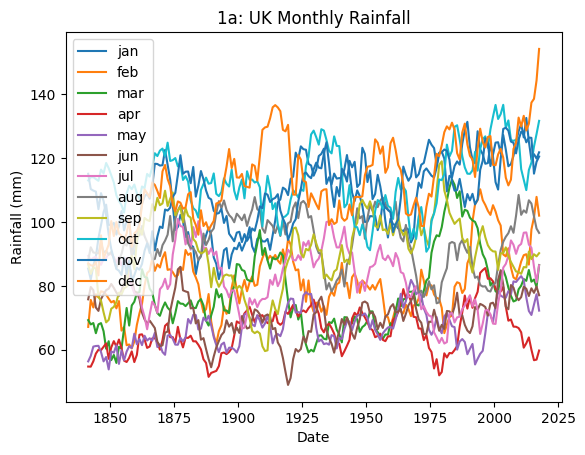

In [80]:
plot_data(rainfall_df, "Date", "Rainfall (mm)", "1a: UK Monthly Rainfall", exclude_columns=["win", "spr", "sum", "aut", "ann"])

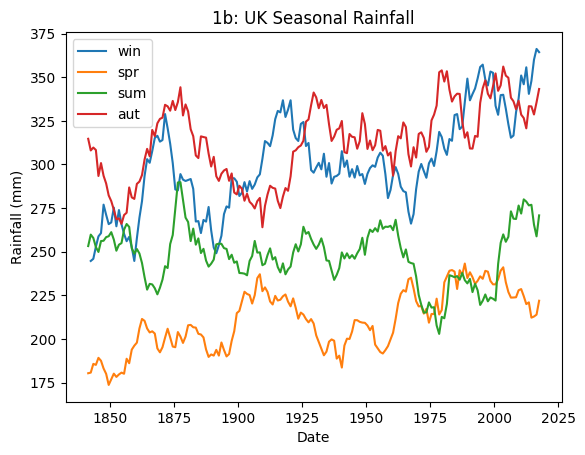

In [81]:
plot_data(rainfall_df, "Date", "Rainfall (mm)", "1b: UK Seasonal Rainfall", exclude_columns=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec", "ann"])

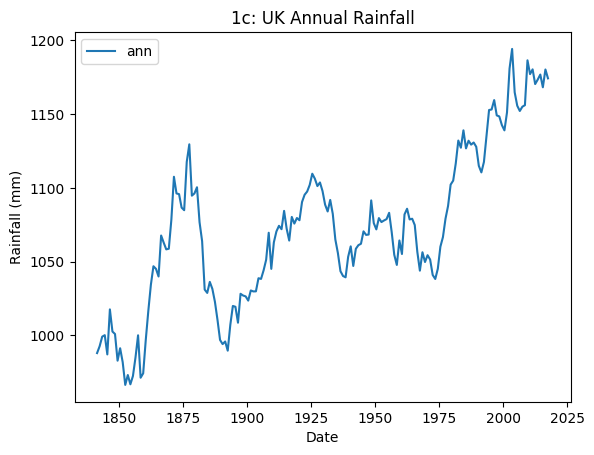

In [82]:
plot_data(rainfall_df, "Date", "Rainfall (mm)", "1c: UK Annual Rainfall", exclude_columns=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec", "win", "spr", "sum", "aut"])

<Axes: title={'center': '1d: Correlation between Weather Variables'}>

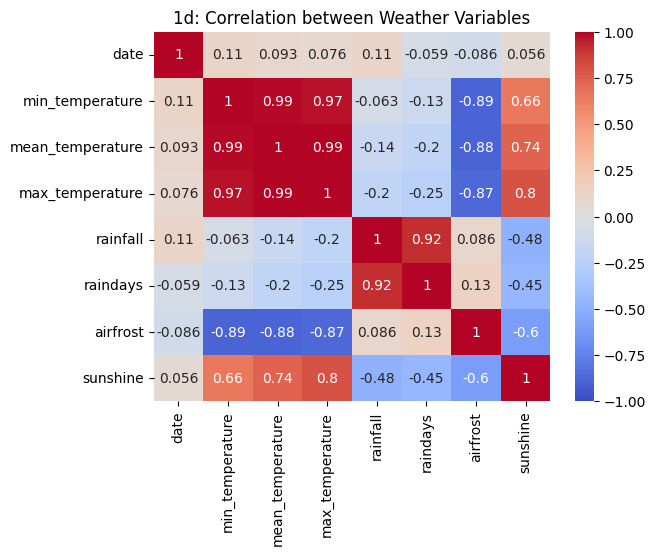

In [83]:
plt.title("1d: Correlation between Weather Variables")
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

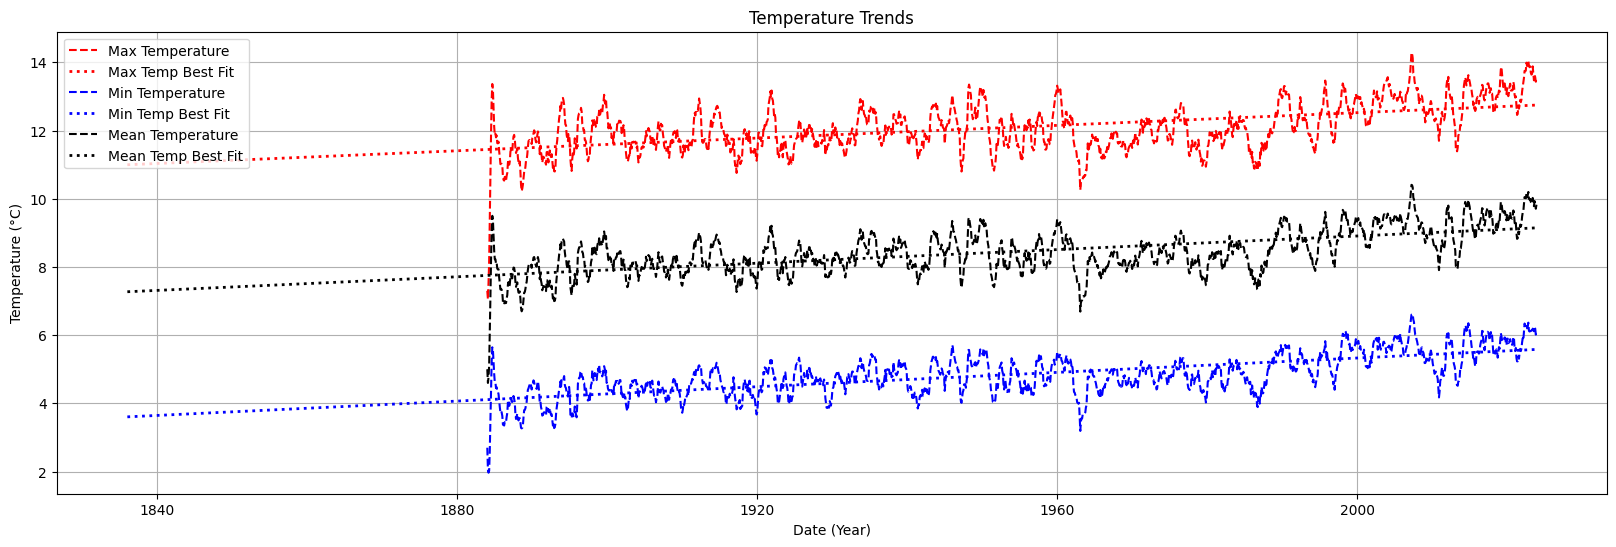

In [84]:
plot_temperature_and_co2(monthly_data, temp_types=['max', 'min', 'mean'], include_best_fit=True, include_points=True, title='Temperature Trends')

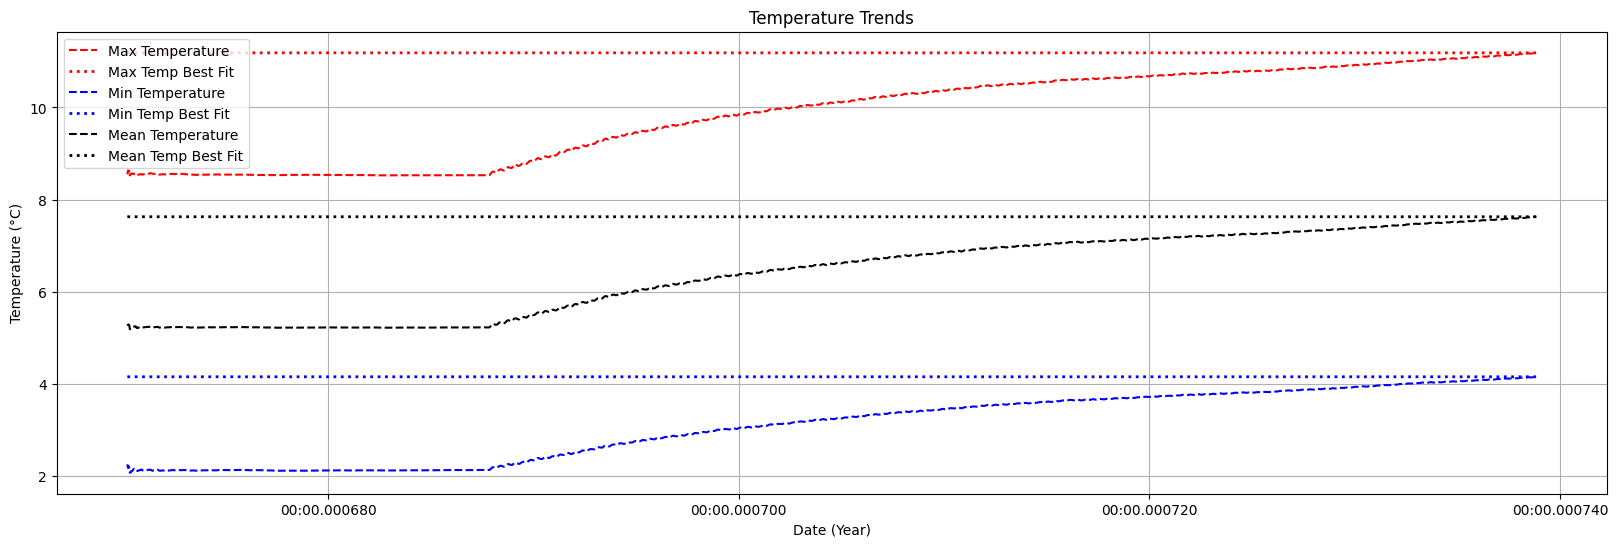

In [85]:
plot_temperature_and_co2(filled_data, temp_types=['max', 'min', 'mean'], include_best_fit=True, include_points=True, title='Temperature Trends')

Clearly there are issues with imputing, thus we will leave guessing missing values. Using the mean is simply not a good idea, as it will skew the data. We will leave the missing values as NaN.


R^2 and equation for Mean Temperature and Sunshine: 
R^2: 0.295
Equation: y = 89.24822x + 585.29

R^2 and equation for Mean Temperature and Rainfall: 
R^2: 0.087
Equation: y = 54.06834x + 627.937

R^2 and equation for Mean Temperature and Airfrost: 
R^2: 0.622
Equation: y = -17.67713x + 213.5


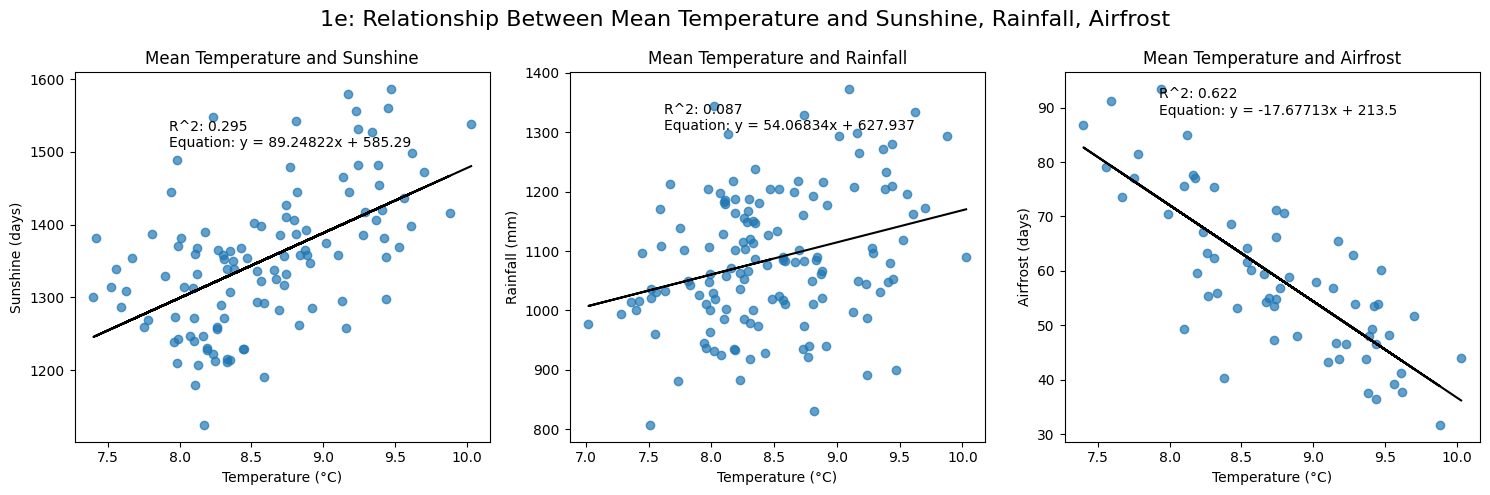

In [86]:
plot_relationships(temperature_sunshine, sunshine, temperature_rainfall, rainfall, temperature_airfrost, airfrost)

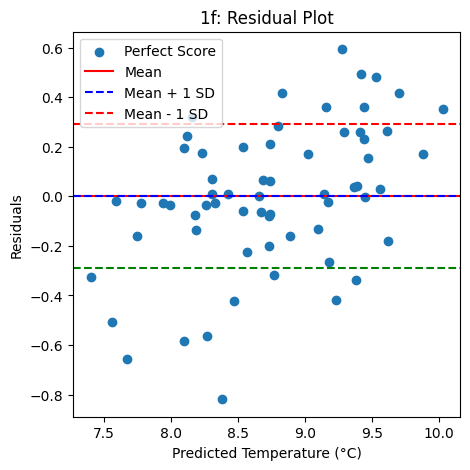

In [87]:
residuals = model.resid

fig, ax = plt.subplots(figsize = (5, 5))

plt.scatter(mean_temperature_cm, residuals)
plt.title("1f: Residual Plot")
plt.xlabel("Predicted Temperature (°C)")
plt.ylabel("Residuals")

# Overlay a horizontal line at y = 0 
plt.axhline(y=0, color='r', linestyle='-')

# Plot shaded standard deviation lines
plt.axhline(y=np.mean(residuals), color='b', linestyle='--')
plt.axhline(y=np.mean(residuals) + np.std(residuals), color='r', linestyle='--')
plt.axhline(y=np.mean(residuals) - np.std(residuals), color='g', linestyle='--')

# Label line in legend
plt.legend(['Perfect Score', 'Mean', 'Mean + 1 SD', 'Mean - 1 SD'], loc='upper left')

plt.show()

Residual analysis for multiple linear regression assumptions. The random distribution (i.e. no obvious pattern) suggests that the model's assumptions are met and that there's no obvious pattern in errors.

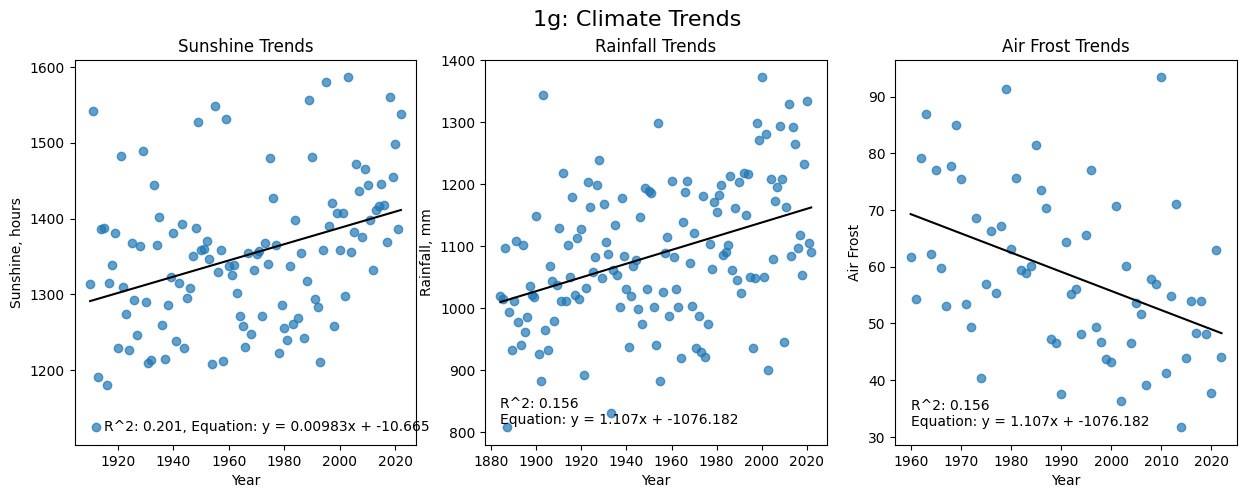

In [88]:
# Plot sunshine, rainfall and air frost data
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
fig.suptitle("1g: Climate Trends", fontsize = 16)

# Sunshine
ax[0].scatter(sunshine_year, sunshine, alpha = 0.7)
ax[0].set_title("Sunshine Trends")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Sunshine, hours")
ax[0].plot(sunshine_year, slope_4 * sunshine_year  + intercept_4, color = "black")
ax[0].text(1915, 1120, mean_text_1, color = "black")

# Rainfall
ax[1].scatter(rainfall_year, rainfall, alpha = 0.7)
ax[1].set_title("Rainfall Trends")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Rainfall, mm")
ax[1].plot(rainfall_year, slope_5 * rainfall_year  + intercept_5, color = "black")
ax[1].text(1884, 813, text_5, color = "black")

# Air Frost
ax[2].scatter(airfrost_year, airfrost, alpha = 0.7)
ax[2].set_title("Air Frost Trends")
ax[2].set_xlabel("Year")
ax[2].set_ylabel("Air Frost")
ax[2].plot(airfrost_year, slope_6 * airfrost_year  + intercept_6, color = "black")
ax[2].text(1960, 32, text_5, color = "black")

plt.show()

## Objective 2: Compare atmospheric CO<sub>2</sub> levels with temperature and if temperature in the UK has been higher in the last three decades than in the late years of the 19th century

### Explanation of Results

Temperatures in the UK have been steadily rising over the last few decades. Linear regression of mean (T<sub>mean</sub>) and max (T<sub>max</sub>) temperature recordings in the UK demonstrates a trend of rising temperatures, with the rate of increase 2.6 times higher for T<sub>mean</sub> and 3.4 times higher for T<sub>max</sub> recordings post-1960 relative to pre-1960 temperature increases (**Figure 2f, Figure 2g**). 

However, it must be noted that this trend is weak, as the R<sup>2</sup> values are around 0.5, suggesting an approximate 50% influence of time on rising temperatures, which may have occurred due to the rather noisy data; data smoothing and outlier detection was attempted, but had little effect on the overall trend. These correlation trends of rising temperatures are confirmed by one-way ANOVA analysis with a Tukey post-hoc test, demonstrating several significant differences between T<sub>mean</sub> and T<sub>max</sub> when comparing temperature data by decades, with the differences observed showing a significant increase in temperatures in the 1990s, 2000s and 2010s compared to previous decades. This significant increase in T<sub>mean</sub> and T<sub>max</sub> recordings in the period of 1990-2010s can be seen on the mean differences plot from the Tukey post hoc results and bar graph (**Figure 2h, Figure 2i, Figure 2j, Figure 2k**), with the 1990s temperature trends partially overlapping with some previous decades, suggesting a smaller magnitude increase in temperatures and almost no overlap of the 2000s and 2010s data with previous decades, suggesting a larger increase in temperature measurements in that period.

### Visualisation

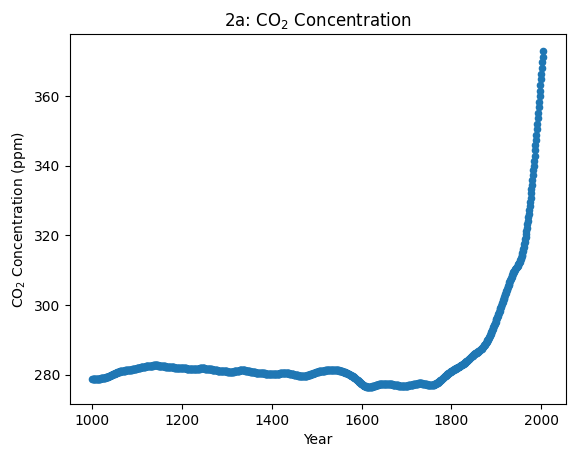

In [89]:
ice_core_co2.plot.scatter("Year","CO2 ppm")
plt.title("2a: CO$_2$ Concentration")
plt.xlabel("Year")
plt.ylabel("CO$_2$ Concentration (ppm)")
plt.show()

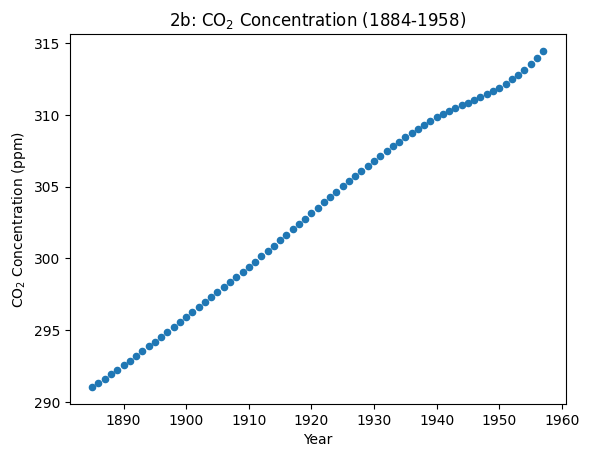

In [90]:
ice_core_co2_concise.plot.scatter("Year","CO2 ppm")
plt.title("2b: CO$_2$ Concentration (1884-1958)")
plt.xlabel("Year")
plt.ylabel("CO$_2$ Concentration (ppm)")
plt.show()

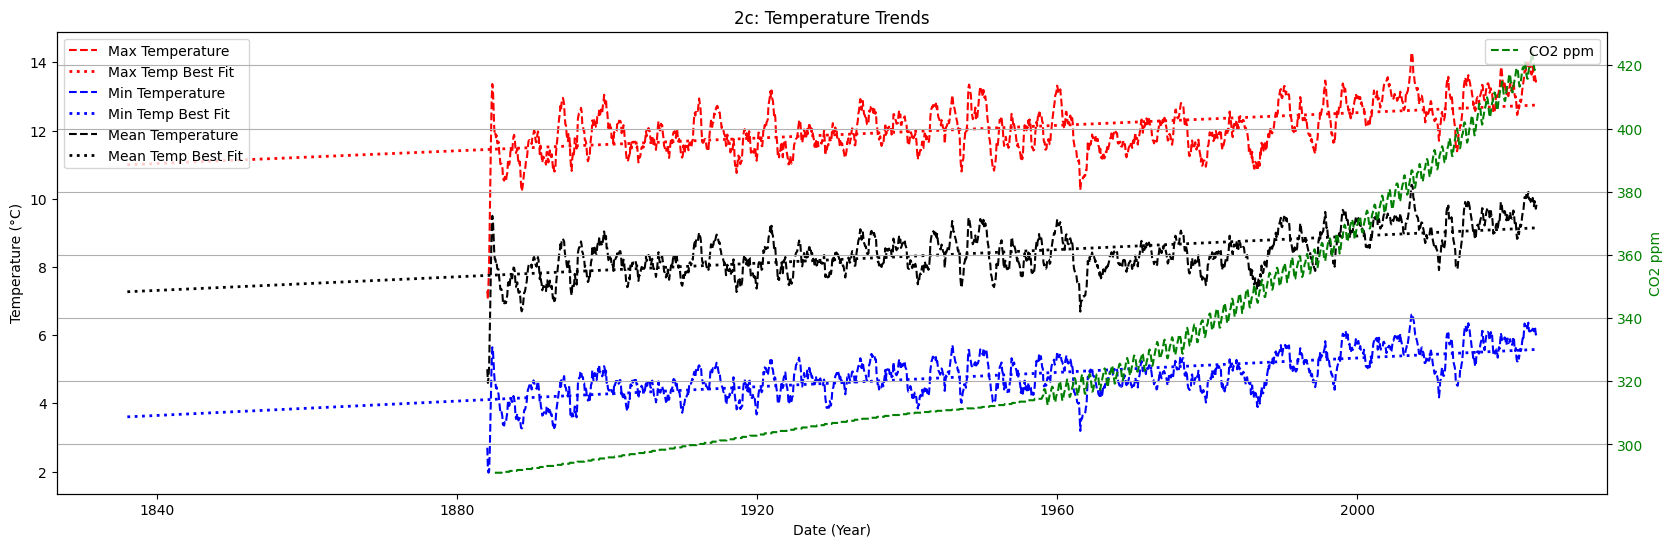

In [91]:
plot_temperature_and_co2(monthly_data, temp_types=['max', 'min', 'mean'], include_best_fit=True, include_points=True, title='2c: Temperature Trends', co2_df=co2_df_year)

It doesn't look a very good correlation, but perhaps it is because of the start point on the axes: the right hand axes make the CO<sub>2</sub> rise over the whole height of the graph, while the temperature rises are "squished" by having them all on the same axes. We could just show CO<sub>2</sub> and max temp?

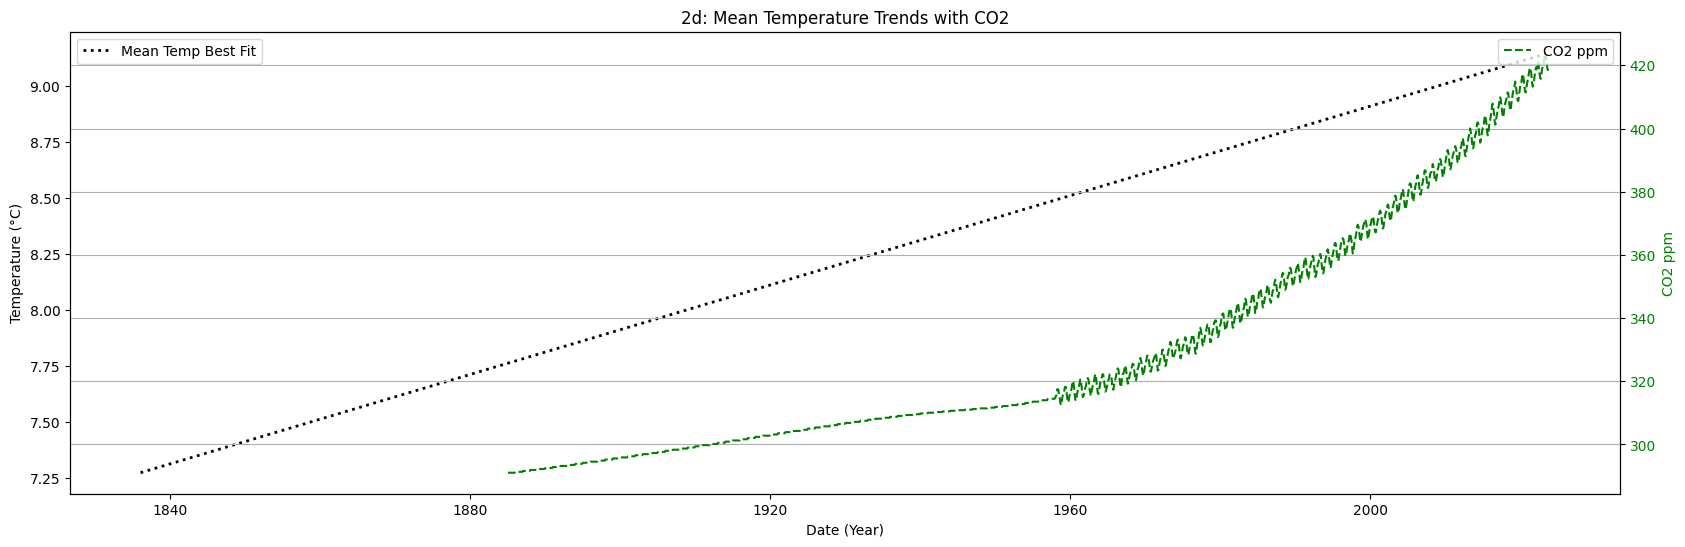

In [92]:
plot_temperature_and_co2(monthly_data, temp_types=['mean'], include_best_fit=True, include_points=False, title='2d: Mean Temperature Trends with CO2', co2_df=co2_df_year)

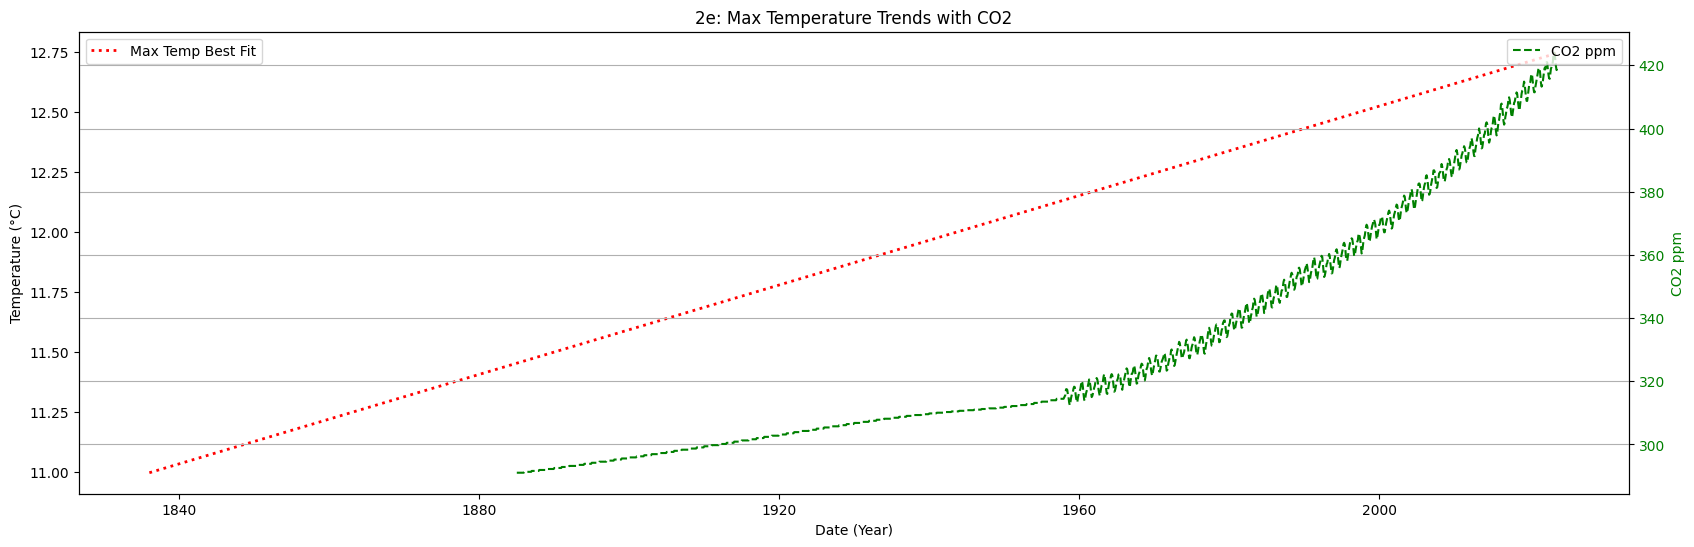

In [93]:
plot_temperature_and_co2(monthly_data, temp_types=['max'], include_best_fit=True, include_points=False, title='2e: Max Temperature Trends with CO2', co2_df=co2_df_year)

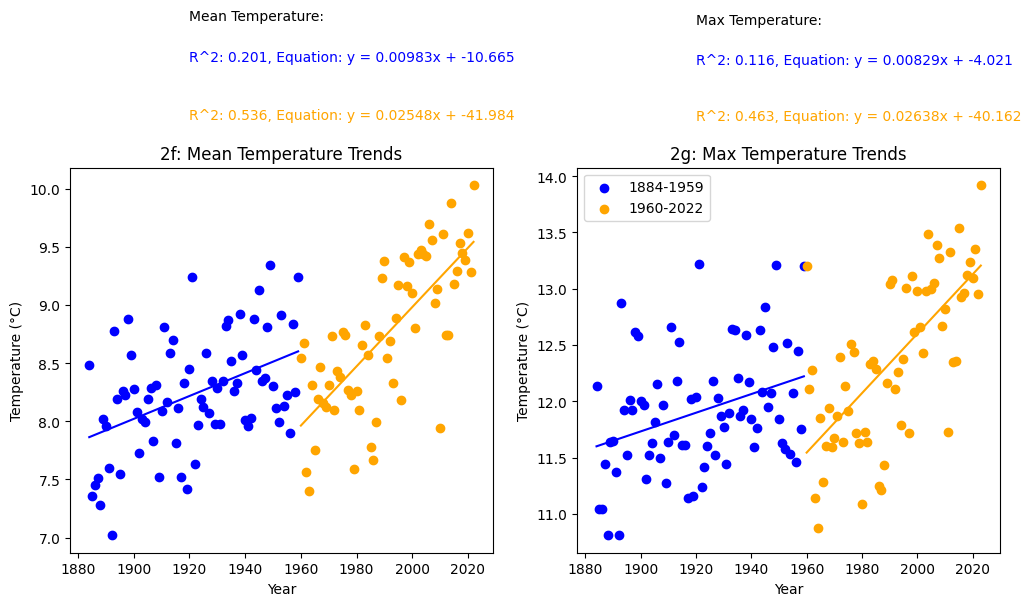

In [94]:
# Data plotting
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

# Mean temperature
mean_temperature_1_year = [int(year) for year in mean_temperature_1_year]
mean_temperature_2_year = [int(year) for year in mean_temperature_2_year]

# Plot scatter graph of pre- and post-1960s data
ax[0].scatter(mean_temperature_1_year, mean_temperature_1, color = "blue")
ax[0].scatter(mean_temperature_2_year, mean_temperature_2, color = "orange")
ax[0].set_title("2f: Mean Temperature Trends")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Temperature (°C)")

# Plot linear regression and equation with R^2 value 
ax[0].plot(mean_temperature_1_year, mean_slope_1 * np.array(mean_temperature_1_year) + mean_intercept_1, color="blue")
ax[0].plot(mean_temperature_2_year, mean_slope_2 * np.array(mean_temperature_2_year) + mean_intercept_2, color="orange")

ax[0].text(1920, 11.45, "Mean Temperature:", color = "black")
ax[0].text(1920, 11.1, mean_text_1, color = "blue")
ax[0].text(1920, 10.6, mean_text_2, color = "orange")

# Max temperature
max_temperature_1_year = [int(year) for year in max_temperature_1_year]
max_temperature_2_year = [int(year) for year in max_temperature_2_year]

# Plot scatter graph of pre- and post-1960s data
ax[1].scatter(max_temperature_1_year, max_temperature_1, color = "blue")
ax[1].scatter(max_temperature_2_year, max_temperature_2, color = "orange")
ax[1].set_title("2g: Max Temperature Trends")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Temperature (°C)")

# Plot linear regression and equation with R^2 value 
ax[1].plot(max_temperature_1_year, max_slope_1 * np.array(max_temperature_1_year) + max_intercept_1, color = "blue")
ax[1].plot(max_temperature_2_year, max_slope_2 * np.array(max_temperature_2_year) + max_intercept_2, color = "orange")

ax[1].text(1920, 15.35, "Max Temperature:", color = "black")
ax[1].text(1920, 15.0, max_text_1, color = "blue")
ax[1].text(1920, 14.5, max_text_2, color = "orange")

# Add legend
ax[1].legend(["1884-1959", "1960-2022"], loc = "upper left")

plt.show()

### Plot mean differences plots for Tukey post hoc test

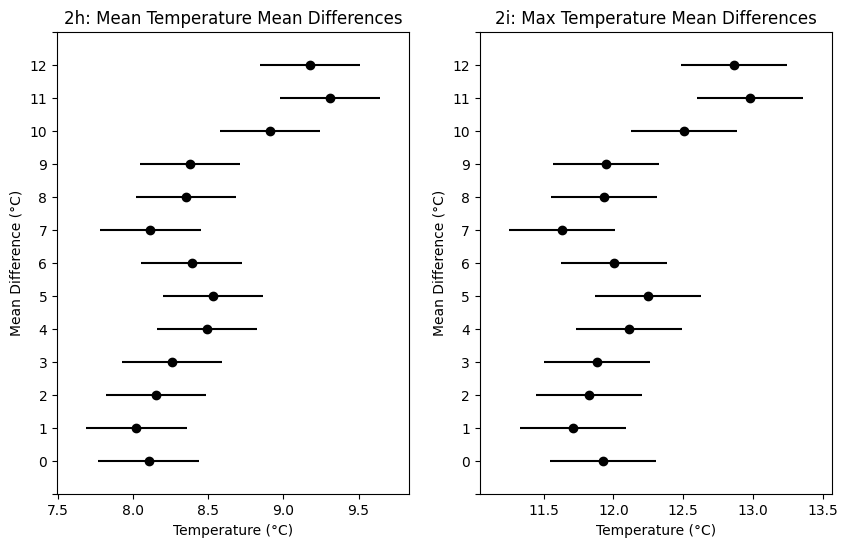

In [95]:
# Plot mean differences plots
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

# Mean temperature
mean_tukey_posthoc.plot_simultaneous(comparison_name = None, ax = ax[0])
ax[0].set_ylabel("Mean Difference (°C)")
ax[0].set_xlabel("Temperature (°C)")
ax[0].set_title("2h: Mean Temperature Mean Differences")

# Max temperature
max_tukey_posthoc.plot_simultaneous(comparison_name = None, ax = ax[1])
ax[1].set_ylabel("Mean Difference (°C)")
ax[1].set_xlabel("Temperature (°C)")
ax[1].set_title("2i: Max Temperature Mean Differences")

plt.show()

## Objective 3: Assessing the Impact of Meteorological Factors on Ground-Level Ozone Concentration

### Explanation of Results

In [96]:
display(df_o3)

,year,Rural_Background,Urban_Background,RB_CI,UB_CI,RB_n,UB_n
0,1987,55.733720,NaN,6.721002,NaN,5,NaN
1,1988,65.649813,NaN,4.659027,NaN,12,NaN
2,1989,67.864646,NaN,4.972931,NaN,14,NaN
3,1990,69.718848,NaN,4.508191,NaN,15,NaN
4,1991,66.794271,NaN,4.455004,NaN,12,NaN
5,1992,67.864186,39.920732,5.035280,12.525720,14,4.0
6,1993,65.215029,40.177077,5.309472,4.829715,14,8.0
7,1994,69.383870,47.429640,3.869374,3.260084,14,13.0
8,1995,70.041854,50.599691,3.851554,4.459545,15,12.0
9,1996,66.705514,45.922460,3.360383,2.793073,15,18.0


**The output from the above cell shows the dataframe, detailing the annual background concentration of ozone in the UK, both rural and urban area, from 1987 to 2006.**

It includes years, average annual ozone concentrations in rural (Rural_Background) and urban (Urban_Background) areas in micrograms per cubic meter, with missing values in some years. The columns RB_CI and UB_CI represent confidence intervals for rural and urban ozone concentrations, indicating uncertainty or variability in these measurements. The RB_n and UB_n columns denote the number of monitoring sites for rural and urban data, respectively. 

The shape method concluded that the dataset has 7 columns and 36 rows. The columns method showed the title of the columns as follows: 'year', 'Rural_Background', 'Urban_Background', 'RB_CI', 'UB_CI', 'RB_n', 'UB_n'. The dataset the year the measurement was taken on ranging from 1987 to 2006, the measurement of the background concentration of Ozone in rural and urban areas in the UK, the confidence interval for the measurements and the number of monitoring sites where the background Ozone conecentrations were measured in order to calculate the mean concentration for both the rural and urban areas. 

The info method brought us insights about the missing data in the urban background column. Since the number of rows is small the dataset was investigated using the display method. it was noted that the data range between x year to year.

Overall, the data suggests an increasing trend in ozone concentration over these years in both settings, with some fluctuations and varying data completeness.

### Visualisation

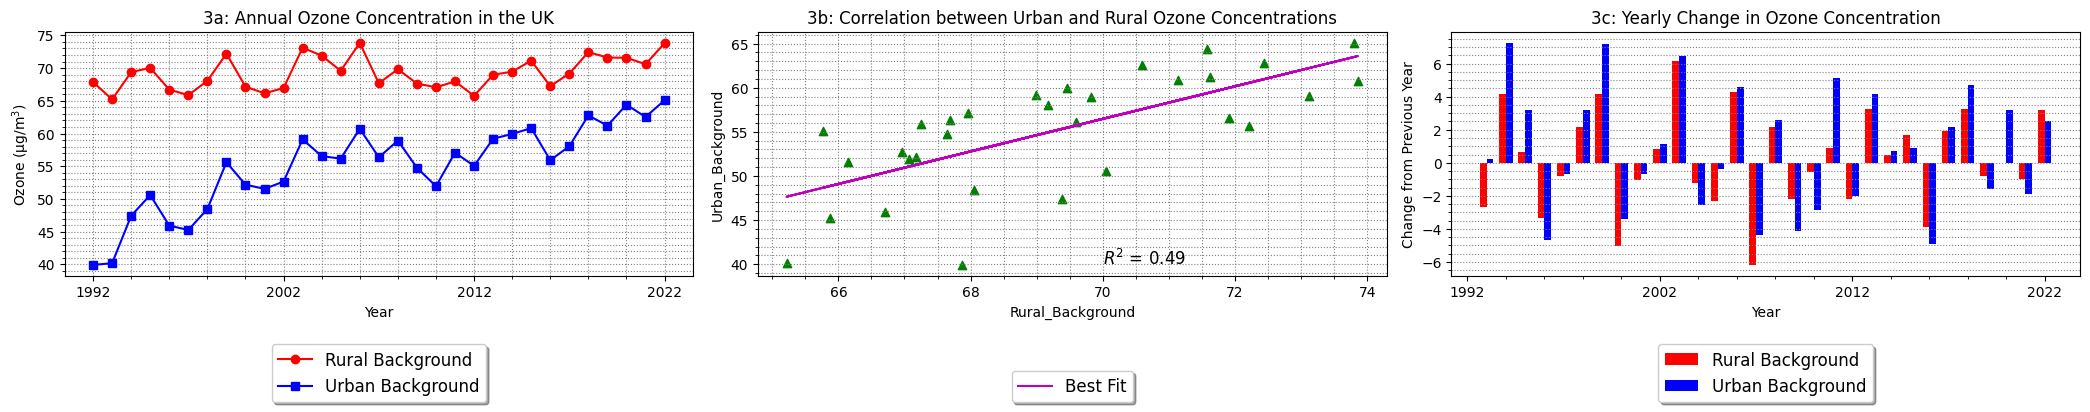

In [97]:
plot_ozone_concentration(df_merged_filtered, info)

The figure consists of three graphs showing different represeantations of the ozone concentration in the UK.

* Figure A shows the evolution of the annual concentration of Ozone in the UK between 1992 and 2020 with red representing rural background ozone levels and blue for urban background. Both datasets show an overall increasing trend in ozone concentration over time, with the rural levels being consistently higher.

* Figure B shows the correlation between Urban and rural Ozone concentrations in the UK. The plot correlates rural background ozone levels (x-axis) with urban background levels (y-axis). The best fit line of the linear regression model indicates a positive relationship with an R squared value of 0.49, suggesting a moderate correlation between rural and urban ozone levels.

* Figure C shows the change in Ozone concentration from previous year in the UK. The graph depicts no particular trand and flactuation over the years. Overall, there was a consistency in the fluctuation trend between the rural and urban Ozzone concentrations.  

Rural Background best fit equation:  
3.089 x + 40.83
Urban Background best fit equation:  
8.745 x - 25.35


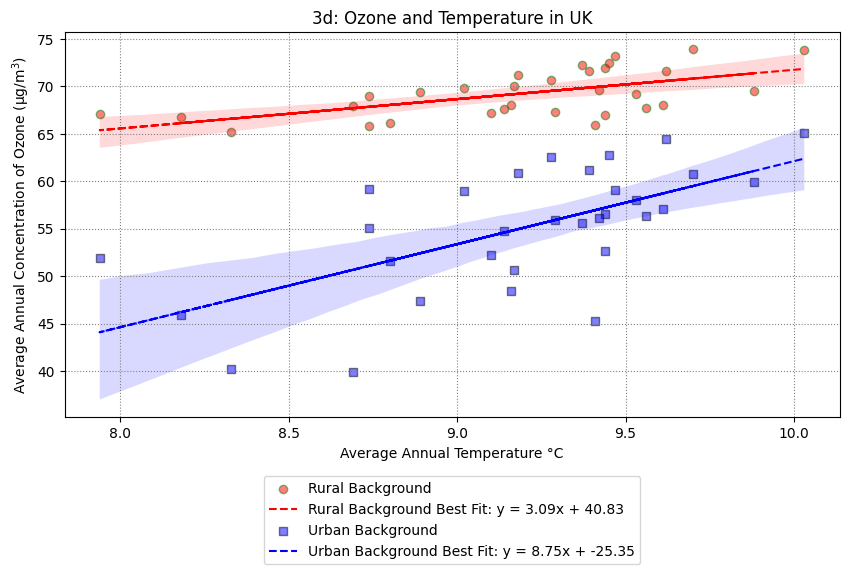

In [98]:
assess_correlation_Ozone_and_meteorological_factor(df_merged_filtered, info)

Ths above figure shows a scatter plot of the relationship between one of the meteorological factors which is the average annual temperature and the average annual concentration of ozone in micrograms per cubic meter (µg/m³) in the UK. 

The red circles represents the average annual concentration of ozone in rural areas of the UK plotted against the average annual temperature. The red line shows the best fit line of the form $y=4.47x+27.81$, where where 'y' is the average annual concentration of ozone and 'x' is the average annual temperature. It is a linear regression indicating the trend in the data. The confidence interval is shown as a shaded area around the line to represent the uncertainty around the best fit line.

The blue squares represents the average annual concentration of ozone in urban areas of the UK plotted against the average annual temperature. The blue line represents the best fit line of the form $y=8.75x+25.35$. 

A positive correlation between temperature and ozone concentration in both rural and urban areas. In other words, the temperature with the increase of the concentration of ozone. The steeper slope in the urban area reflects a stronger correlation compared to the rural areas, which indicates that the temperature might have a remarkable impact on the concentration of Ozone in in urban areas. The wider confidence interval of the concentration of Ozone in the rural areas suggests more uncertainty and variability in the trends and the measurements.

## Objective 4: Investigation of Effect of Global Warming on Rainfall Intensity and Heatwaves in Yorkshire

### Explanation of Results

The results presented below demonstrate that temperatures in Yorkshire have risen over the last 140 years, with a pattern closely consistent with the UK data described above. This is illustrated in **Figure 4a** below. Analysis of finer-grained (daily) data allows us to investigate whether have been more periods of high temperature, or longer ones. Unfortunately this daily data is only available from 1960, but since this is the period of most intense global CO<sub>2</sub> and temperature rise, as shown above, this should be the most interesting period. For the purpose of this analysis, a "period of high temperature" has been defined as 3 or more days where the peak temperature exceeds the specified temperature, consistent with the Met Office definition for heatwaves. This reveals that formal heat waves (temperatures of 26<sup>o</sup> C or above) are still relatively uncommon, though there appears to be an increasing trend over time (**Figure 4b**). When investigating periods with temperatures at or above 20<sup>o</sup> C, there is a clear trend for increasing frequency of such events (**Figure 4c**), and weaker evidence of an increase in their duration (**Figure 4d**). 

there does appear to be a modest increase in the total amount of annual rainfall in Yorkshire (**Figure 4e**), and in the intensity of rainfall (i.e. the amount of rain that falls on a "rainy day") over time during the last century (**Figure 4f**). However, there does not appear to be any increase in the number of rainy periods (**Figure 4h**), or the duration of such periods (**Figure 4i**). 

This is consistent with the view that weather events (specifically rainstorms) have become more severe, without much change in the overall distribution of rainy or sunny weather. The increased number and length of the "warm periods" is likely to reflect the underlying temperature rise, rather than an increase in the frequency of such events, though it is difficult to be sure about this, given the high levels of variability in the data.

### Visualisation

In [99]:
display(drf_df)

,No. rainy episodes,Mean duration,Total No days,Mean volume,Total volume,Mean daily rainfall
Year,,,,,,
1891,51,3.352941,171,15.560026,793.56134,4.257260
1892,67,2.492537,167,11.789915,789.92431,4.258132
1893,60,2.433333,146,10.657731,639.46385,4.251232
1894,60,2.900000,174,13.346735,800.80407,4.211851
1895,55,2.963636,163,15.478474,851.31609,4.160557
...,...,...,...,...,...,...
2018,65,2.353846,153,11.368586,738.95806,4.224048
2019,55,3.181818,175,17.365961,955.12788,5.063941
2020,54,3.240741,175,17.217676,929.75449,4.471386


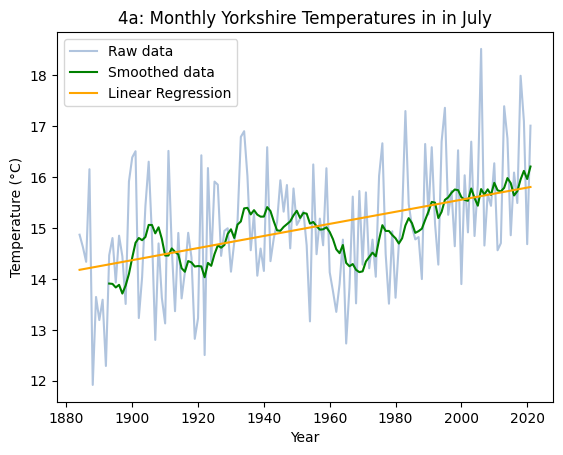

The equation of the linear regression line is y=0.01187x - 8.19


In [100]:
x_vals = df_yorks_temp[df_yorks_temp["month_number"] == 7]["calendar_year"]
y_vals = df_yorks_temp[df_yorks_temp["month_number"] == 7]["tas"]

plot_raw_smoothed(x_vals,y_vals,10, title = "4a: Monthly Yorkshire Temperatures in in July")

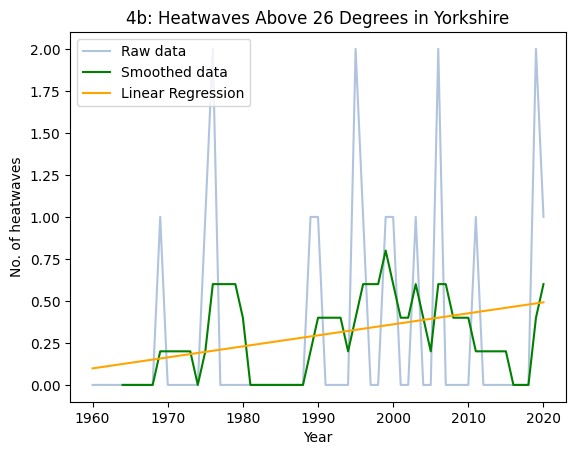

The equation of the linear regression line is y=0.00656x - 12.75


In [101]:
heatwaves26 = FindHeatWaves(26)
plot_raw_smoothed(heatwaves26["Year"],heatwaves26["No. of heatwaves"],5,title = "4b: Heatwaves Above 26 Degrees in Yorkshire", ylabel = "No. of heatwaves")

The output of the function is a DataFrame summarizing the annual occurrence and average duration of heatwaves. This provides valuable insights into climate trends, particularly the frequency and severity of extreme heat events in the historical data. Such analysis is key to understanding the impact of climate change and preparing for future weather patterns. Taking the Met Office's current threshold, we see that there are relatively few heatwaves, though there is a suggestion that they are becoming more frequent (4 during the first 30 years of data, and 11 in the next 30 years).

To investigate this further, we looked at the frequencies if we set the threshold a bit lower - at 20 degrees.

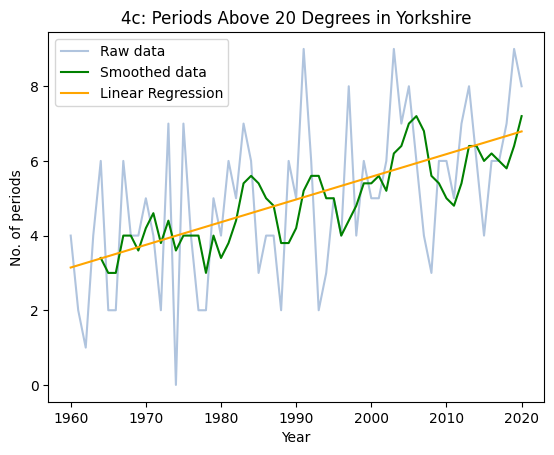

The equation of the linear regression line is y=0.06076x - 115.95


In [102]:
heatwaves20 = FindHeatWaves(20)
plot_raw_smoothed(heatwaves20["Year"],heatwaves20["No. of heatwaves"],5,title = "4c: Periods Above 20 Degrees in Yorkshire", ylabel = "No. of periods")

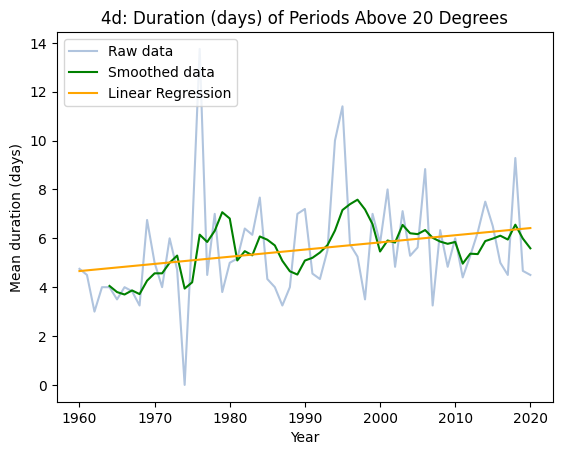

The equation of the linear regression line is y=0.02933x - 52.84


In [103]:
plot_raw_smoothed(heatwaves20["Year"],heatwaves20["Mean duration"],5,title = "4d: Duration (days) of Periods Above 20 Degrees", ylabel = "Mean duration (days)")

Now there is a clear trend towards more episodes of relatively high temperatures, and some indication that there is an increase in their duration.

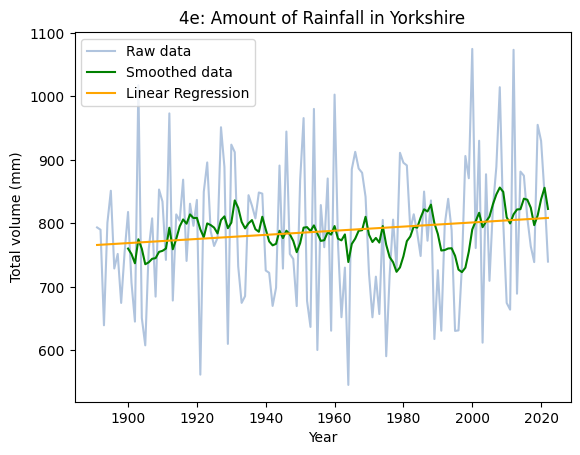

The equation of the linear regression line is y=0.32491x + 151.55


In [104]:
drf_df.reset_index(inplace = True)
plot_raw_smoothed(drf_df["Year"],drf_df["Total volume"],10,title = "4e: Amount of Rainfall in Yorkshire", ylabel = "Total volume (mm)")

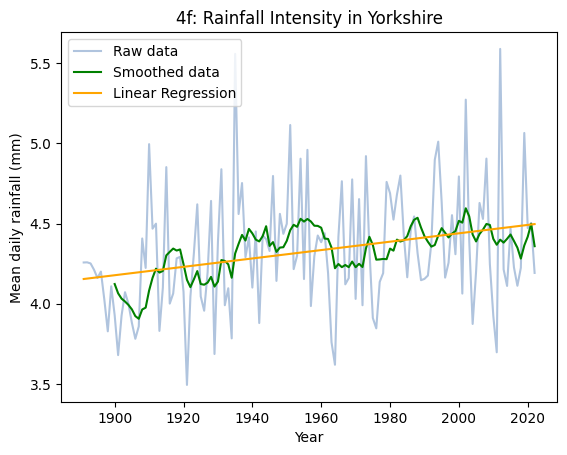

The equation of the linear regression line is y=0.00261x - 0.78


In [105]:
plot_raw_smoothed(drf_df["Year"],drf_df["Mean daily rainfall"],10,title = "4f: Rainfall Intensity in Yorkshire", ylabel = "Mean daily rainfall (mm)")

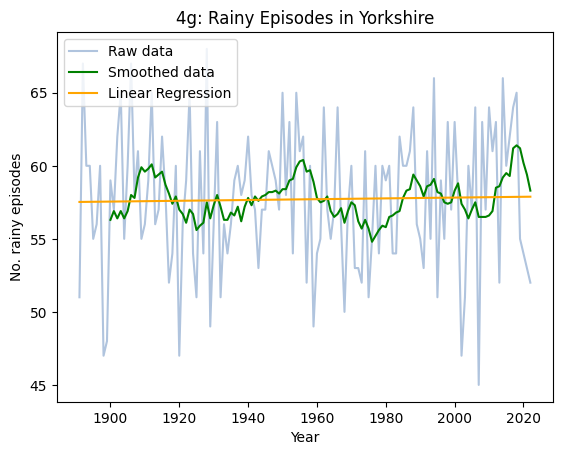

The equation of the linear regression line is y=0.00274x + 52.35


In [106]:
plot_raw_smoothed(drf_df["Year"],drf_df["No. rainy episodes"],10,title = "4g: Rainy Episodes in Yorkshire", ylabel = "No. rainy episodes")

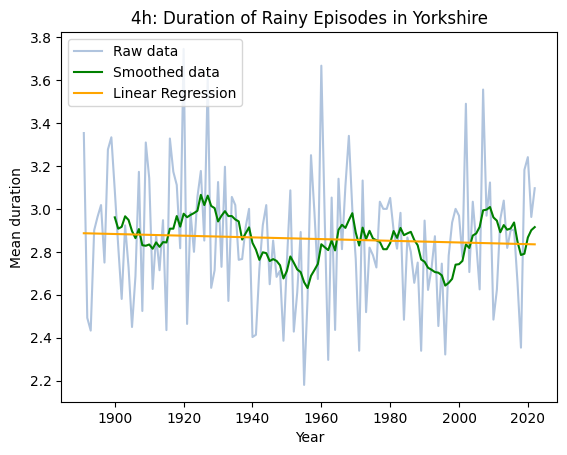

The equation of the linear regression line is y=-0.00039x + 3.63


In [107]:
plot_raw_smoothed(drf_df["Year"],drf_df["Mean duration"],10,title = "4h: Duration of Rainy Episodes in Yorkshire", ylabel = "Mean duration")

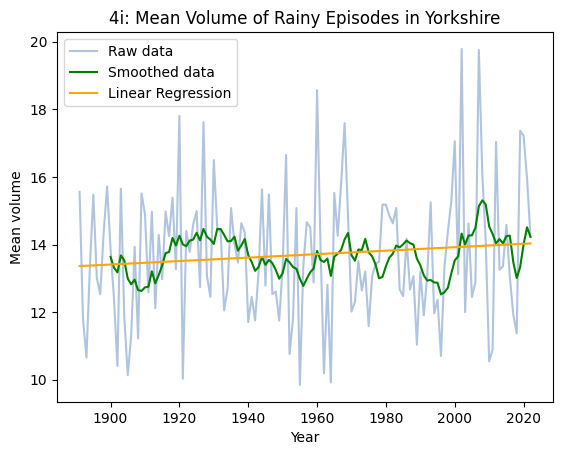

The equation of the linear regression line is y=0.00512x + 3.69


In [108]:
plot_raw_smoothed(drf_df["Year"],drf_df["Mean volume"],10,title = "4i: Mean Volume of Rainy Episodes in Yorkshire", ylabel = "Mean volume")

# Conclusion (5 marks)

### Achievements

Clear evidence that temperature, rainfall intensity and high temperature periods have increased in Yorkshire since the 1960’s when global CO2 levels started to rise dramatically.

Global CO2 levels were almost constant until the 1800’s and even then rose only slowly until the 1960’s: a very similar pattern of average temperature is seen, consistent with the hypothesis that rising CO2 is causing global warming.

This objective demonstrates several patterns found in UK temperature and weather in the last few decades. Firstly, the rate at which temperature has been increasing is higher in the post-1960s period, relative to the pre-1960s period. Analysis also shows that the last three decades (1990s, 2000s, 2010s) have had a statistically higher annual mean and max temperature relative to previous decades. 

Although sunshine, rainfall and air frost have been found to only be weakly correlated with temperature in the UK, the general trend of increasing sunshine and decreasing air frost over time and the significant combined effects of sunshine and air frost on temperatures in the UK suggests that these changing weather patterns may at least play a small role in changing temperatures in the UK.

### Limitations

The correlations are largely descriptive and qualitative: although correlation coefficients have been provided, and indicate  increased temperature, rainfall intensity and high temperature periods, statistical differences have not been calculated.

There are very substantial fluctuations in local temperature and rainfall data due to other factors that make it hard to detect the effects of global warming directly. 

The correlations found in this analysis were often very weak, which could be due to the noisy nature of the data, with the noise possibly occurring as a result of natural fluctuations in weather. These weak correlations could also occur as a result of using UK-wide data rather than localised data and using annualised averages rather than using data on the scale of months or seasons. More localised data with a higher temporal resolution may find that these patterns are more strongly correlated.

### Future Work

More detailed statistical analysis of the data, including statistical tests of significance, would be useful. Cross-correlation of daily temperature and rainfall intensity: does a higher temperature during rainy spells result in more rainfall?

Analysing data from more areas, and averaging effects geographically, may make the climate change effects clearer. A similar effect might be made by more effective use of smoothing the data (for example, variations on the rolling means used here).

Whilst this analysis demonstrates the patterns as they have been observed in recent decades, no analysis was done on future projections, especially considering that these continuing climate changes are likely to have a huge effect on human civilisation in the future. Machine learning models could be used to predict projections of patterns in the future, comparing these to other sources of data that indicate the effects on human civilisation in the UK with these extreme climate changes. 

Furthermore, this analysis architecture could be combined with more factors to investigate whether there are other factors that affect temperature in the UK.